___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___

<h1 style="text-align: center;">Deep Learning<br><br>Assignment-1 (ANN)<br><br>Churn Prediction for Bank Customer<br><h1>

# Dataset Info

We have a dataset in which there are details of a bank's customers and the target variable is a binary variable reflecting the fact whether the customer left the bank (closed his account) or he continues to be a customer.

The features in the given dataset are:
- **rownumber:** Row Numbers from 1 to 10000.
- **customerid:** A unique ID that identifies each customer.
- **surname:** The customer’s surname.
- **creditscore:** A credit score is a number between 300–850 that depicts a consumer's creditworthiness.
- **geography:** The country from which the customer belongs to.
- **Gender:** The customer’s gender: Male, Female
- **Age:** The customer’s current age, in years, at the time of being customer.
- **tenure:** The number of years for which the customer has been with the bank.
- **balance:** Bank balance of the customer.
- **numofproducts:** the number of bank products the customer is utilising.
- **hascrcard:** The number of credit cards given to the customer by the bank.
- **isactivemember:** Binary Flag for indicating if the client is active or not with the bank before the moment where the client exits the company (recorded in the variable "exited")
- **exited:** Binary flag 1 if the customer closed account with bank and 0 if the customer is retained.
******************

Bir bankanın müşterilerinin detaylarının yer aldığı bir veri setimiz var ve hedef değişken, müşterinin bankadan ayrılıp ayrılmadığını (hesabını kapattığını) veya müşteri olmaya devam edip etmediğini yansıtan ikili bir değişkendir.

Verilen veri kümesindeki özellikler şunlardır:
- **satır numarası:** 1'den 10000'e kadar olan Satır Numaraları.
- **müşteri kimliği:** Her müşteriyi tanımlayan benzersiz bir kimlik.
- **soyadı:** Müşterinin soyadı.
- **kredi puanı:** Kredi puanı, bir tüketicinin kredi itibarını gösteren 300-850 arasında bir sayıdır.
- **coğrafya:** Müşterinin ait olduğu ülke.
- **Cinsiyet:** Müşterinin cinsiyeti: Erkek, Kadın
- **Yaş:** Müşterinin, müşteri olduğu andaki yıl olarak mevcut yaşı.
- **görev süresi:** Müşterinin bankada bulunduğu yıl sayısı.
- **bakiye:** Müşterinin banka bakiyesi.
- **ürün sayısı:** müşterinin kullandığı banka ürünlerinin sayısı.
- **hascrcard:** Banka tarafından müşteriye verilen kredi kartı sayısı.
- **isactivemember:** Müşterinin şirketten ayrıldığı andan önce bankada aktif olup olmadığını gösteren İkili Bayrak ("çıkış" değişkenine kaydedilir)
- **çıkış:** Müşteri bankadaki hesabını kapattıysa ikili bayrak 1 ve müşteri elde tutulduysa 0.

# Import Libraries & Data

In [158]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")
warnings.warn("this will not show")

plt.rcParams["figure.figsize"] = (10,6)

sns.set_style("whitegrid")
pd.set_option('display.float_format', lambda x: '%.3f' % x)

# Set it None to display all rows in the dataframe
# pd.set_option('display.max_rows', None)

# Set it to None to display all columns in the dataframe
pd.set_option('display.max_columns', None)

In [159]:
df = pd.read_csv("Churn_Modelling.csv")

# Exploratory Data Analysis and Visualization

1. Implement basic steps to see how is your data looks like
2. Check for missing values
3. Drop the features that not suitable for modelling
4. Implement basic visualization steps such as histogram, countplot, heatmap
5. Convert categorical variables to dummy variables
*********
1. Verilerinizin nasıl göründüğünü görmek için temel adımları uygulayın 
2. Eksik değerleri kontrol edin 
3. Modellemeye uygun olmayan özellikleri bırakın 
4. Histogram, sayım grafiği, ısı haritası gibi temel görselleştirme adımlarını uygulayın 
5. Kategorik değişkenleri kukla değişkenlere dönüştürün

In [160]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.000,1,1,1,101348.880,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.860,1,0,1,112542.580,0
2,3,15619304,Onio,502,France,Female,42,8,159660.800,3,1,0,113931.570,1
3,4,15701354,Boni,699,France,Female,39,1,0.000,2,0,0,93826.630,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.820,1,1,1,79084.100,0


In [161]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [162]:
df.isnull().sum().any()

False

In [163]:
df.duplicated().sum()

0

In [164]:
df.shape

(10000, 14)

In [165]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
RowNumber,10000.000,5000.500,2886.896,1.000,2500.750,5000.500,7500.250,10000.000
CustomerId,10000.000,15690940.569,71936.186,15565701.000,15628528.250,15690738.000,15753233.750,15815690.000
CreditScore,10000.000,650.529,96.653,350.000,584.000,652.000,718.000,850.000
Age,10000.000,38.922,10.488,18.000,32.000,37.000,44.000,92.000
Tenure,10000.000,5.013,2.892,0.000,3.000,5.000,7.000,10.000
Balance,10000.000,76485.889,62397.405,0.000,0.000,97198.540,127644.240,250898.090
NumOfProducts,10000.000,1.530,0.582,1.000,1.000,1.000,2.000,4.000
HasCrCard,10000.000,0.706,0.456,0.000,0.000,1.000,1.000,1.000
IsActiveMember,10000.000,0.515,0.500,0.000,0.000,1.000,1.000,1.000
EstimatedSalary,10000.000,100090.240,57510.493,11.580,51002.110,100193.915,149388.247,199992.480


In [166]:
df = df.drop(['RowNumber', 'CustomerId', 'Surname'], axis = 1)  

In [167]:
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.000,1,1,1,101348.880,1
1,608,Spain,Female,41,1,83807.860,1,0,1,112542.580,0
2,502,France,Female,42,8,159660.800,3,1,0,113931.570,1
3,699,France,Female,39,1,0.000,2,0,0,93826.630,0
4,850,Spain,Female,43,2,125510.820,1,1,1,79084.100,0


In [168]:
df.Exited.value_counts()

0    7963
1    2037
Name: Exited, dtype: int64

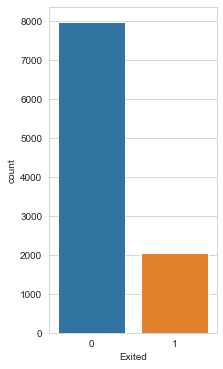

In [169]:
plt.figure(figsize = (3,6))
df["Exited"].value_counts()
sns.countplot(df["Exited"]);

# Imbalance Data!!!

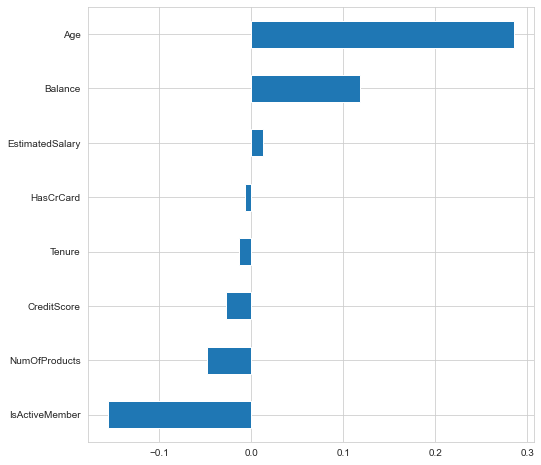

In [170]:
plt.figure(figsize = (8,8))
df.corr()["Exited"].sort_values().drop("Exited").plot(kind = "barh");

# Exited ile diger sütunlarin durumuna bakarsak

In [171]:
df.nunique()

CreditScore         460
Geography             3
Gender                2
Age                  70
Tenure               11
Balance            6382
NumOfProducts         4
HasCrCard             2
IsActiveMember        2
EstimatedSalary    9999
Exited                2
dtype: int64

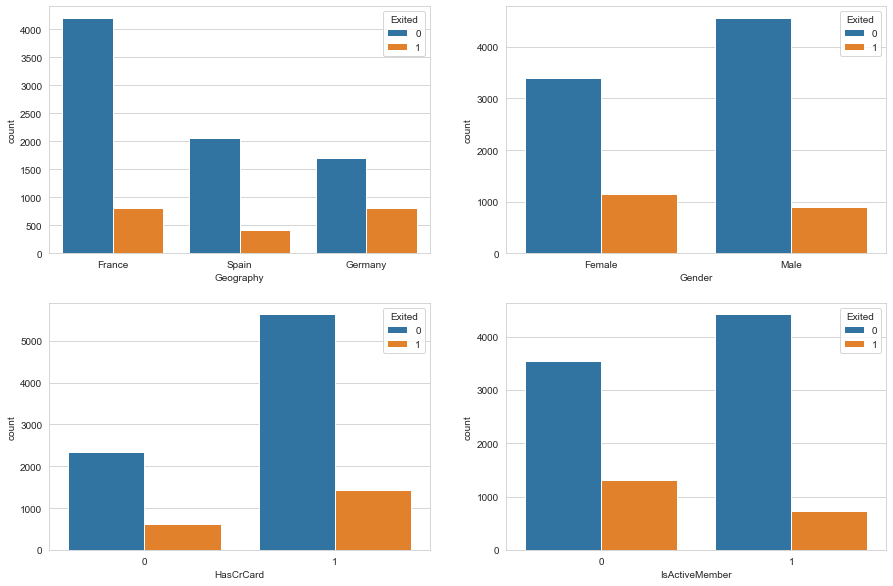

In [172]:
    fig, axarr = plt.subplots(2, 2, figsize=(15, 10))
    sns.countplot(x='Geography', hue = 'Exited',data = df, ax=axarr[0][0])
    sns.countplot(x='Gender', hue = 'Exited',data = df, ax=axarr[0][1])
    sns.countplot(x='HasCrCard', hue = 'Exited',data = df, ax=axarr[1][0])
    sns.countplot(x='IsActiveMember', hue = 'Exited',data = df, ax=axarr[1][1]);

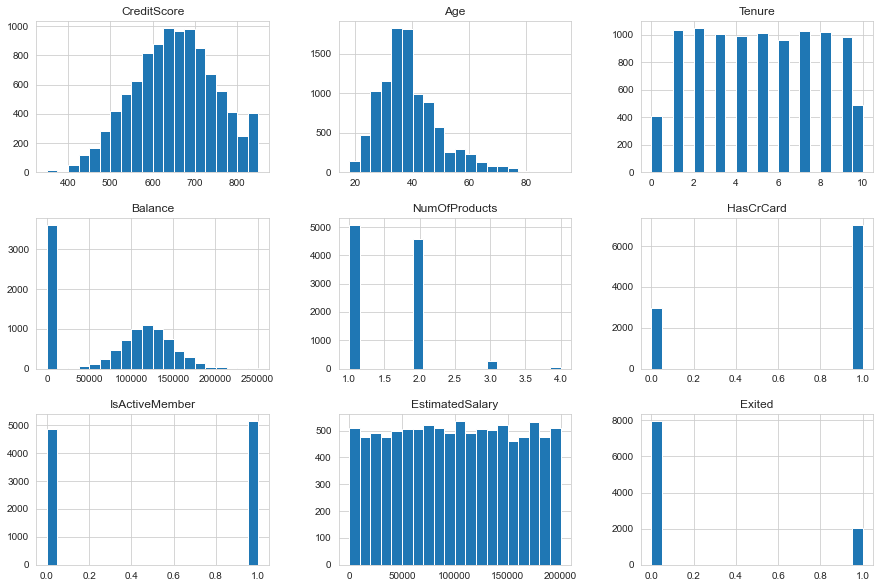

In [173]:
df.hist(figsize=(15, 10), bins=20);

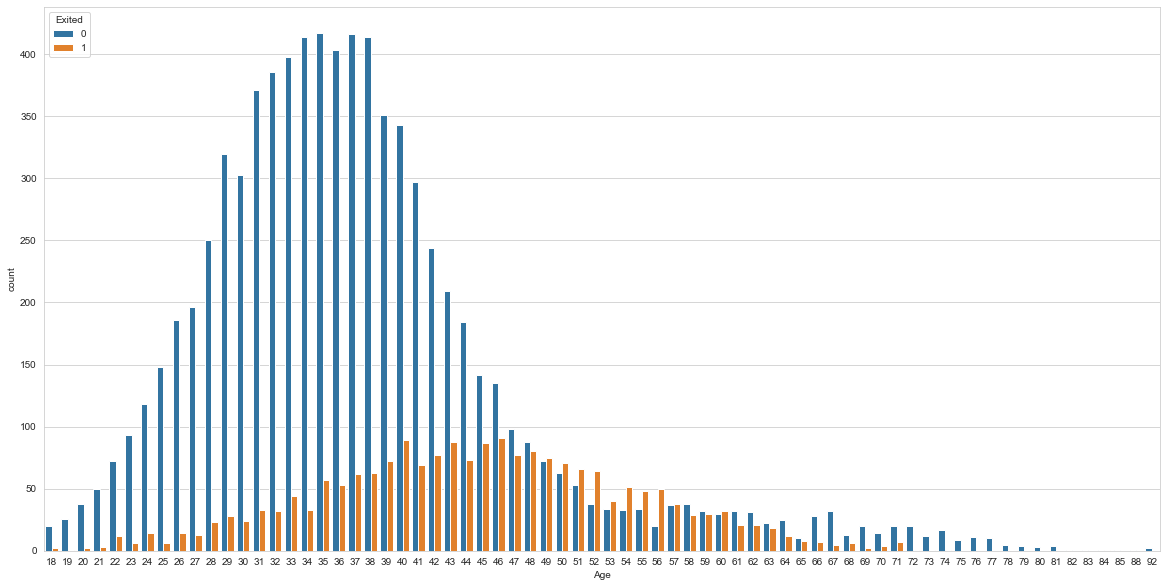

In [174]:
plt.figure(figsize = (20, 10))
sns.countplot(df.Age, hue=df.Exited);

mertik recall olabilir. validation split, 1 leri iyilestirmeye calisin.

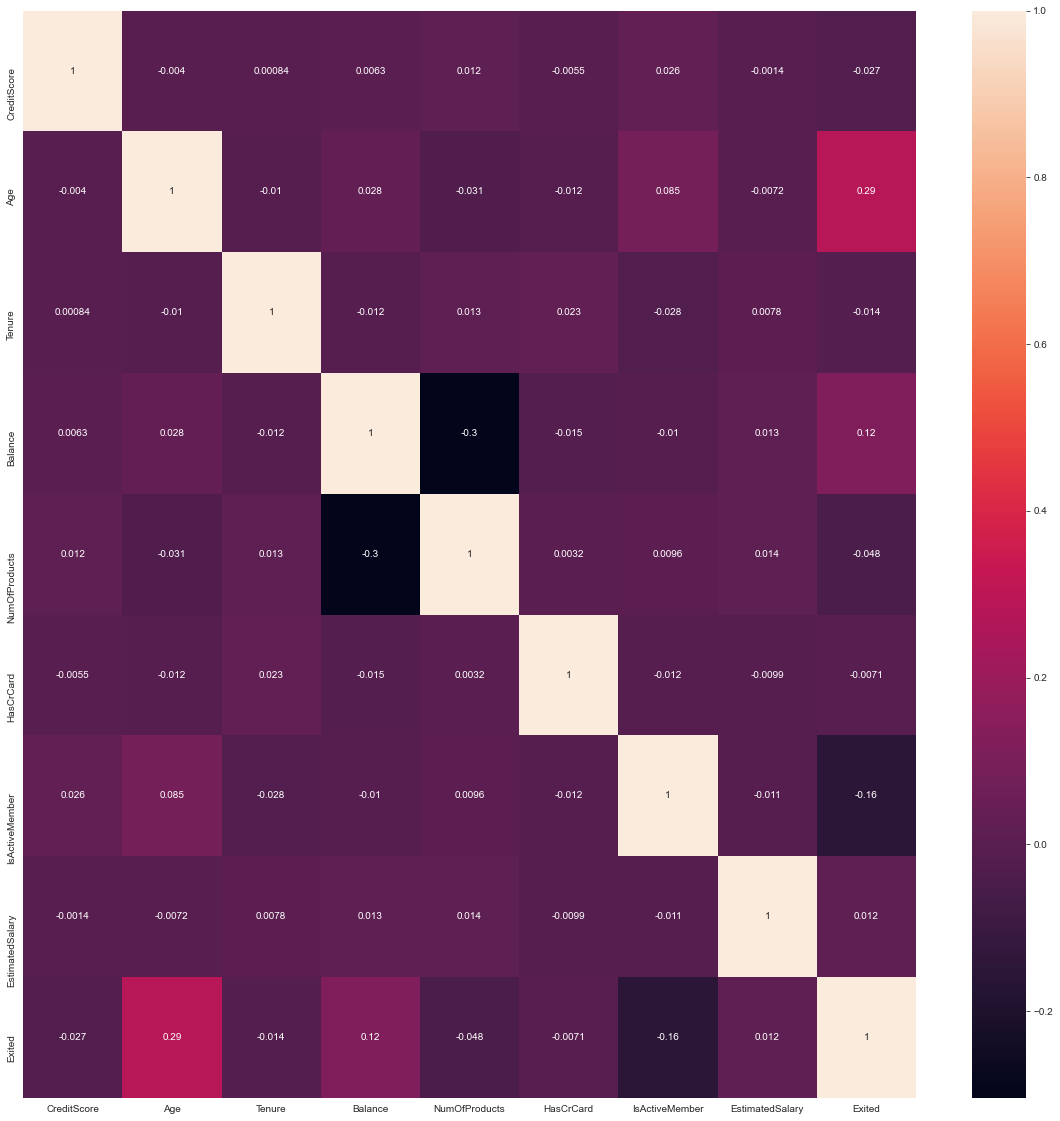

In [175]:
plt.figure(figsize=(20,20))
sns.heatmap(df.corr(), annot=True);

# Multicollinearity sorunu yok.

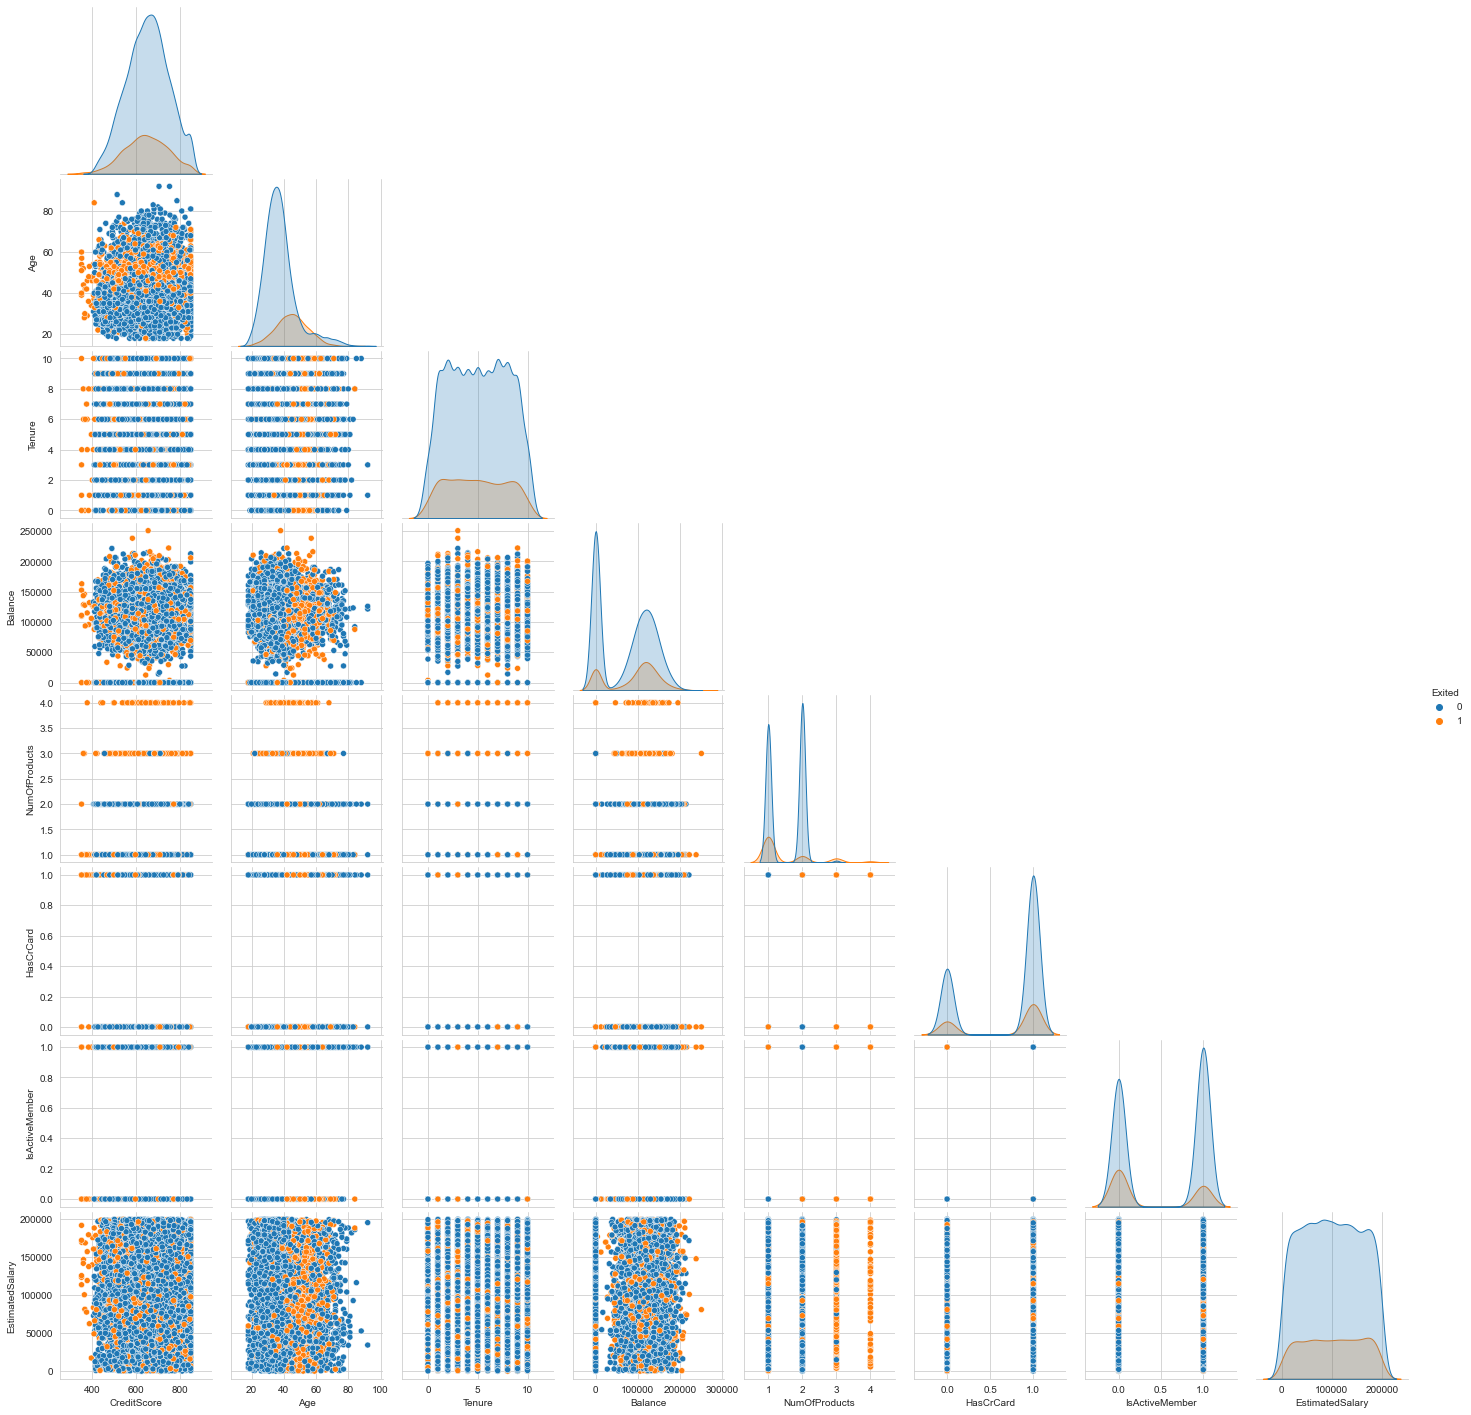

In [178]:
sns.pairplot(df, hue='Exited', corner=True);

<AxesSubplot:xlabel='Exited', ylabel='EstimatedSalary'>

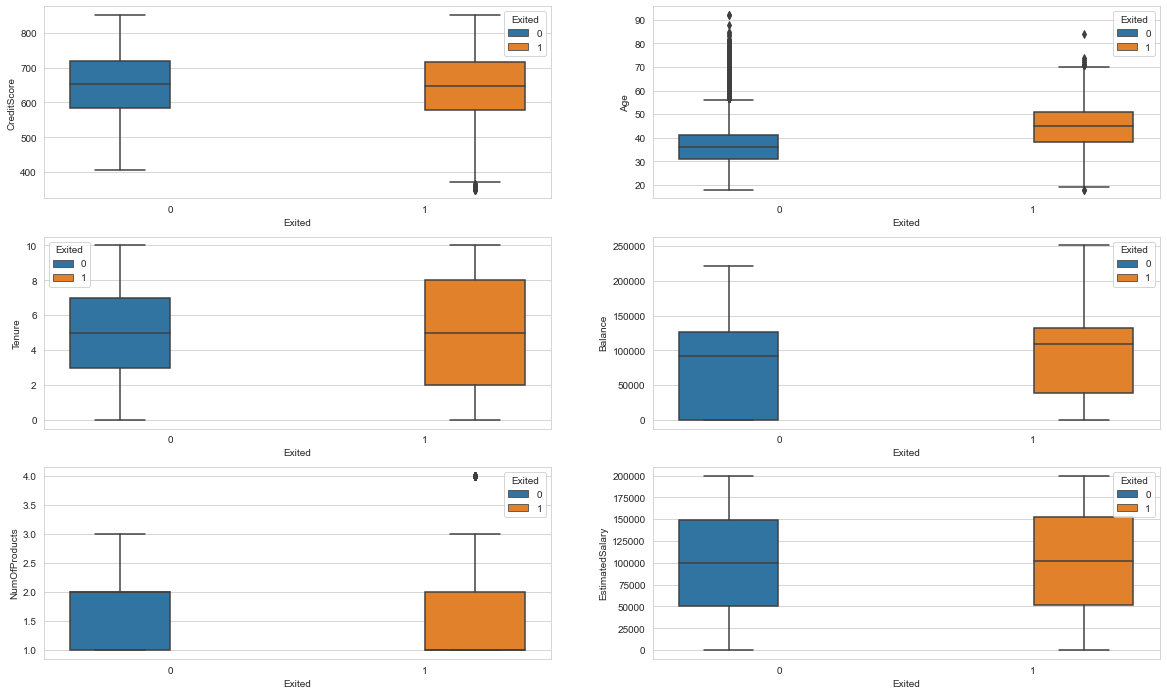

In [179]:
fig, axarr = plt.subplots(3, 2, figsize=(20, 12))
sns.boxplot(y='CreditScore',x = 'Exited', hue = 'Exited', data = df, ax=axarr[0][0])
sns.boxplot(y='Age',x = 'Exited', hue = 'Exited', data = df , ax=axarr[0][1])
sns.boxplot(y='Tenure',x = 'Exited', hue = 'Exited', data = df, ax=axarr[1][0])
sns.boxplot(y='Balance',x = 'Exited', hue = 'Exited', data = df, ax=axarr[1][1])
sns.boxplot(y='NumOfProducts',x = 'Exited', hue = 'Exited', data = df, ax=axarr[2][0])
sns.boxplot(y='EstimatedSalary',x = 'Exited', hue = 'Exited', data = df, ax=axarr[2][1])

In [180]:
df = pd.get_dummies(df, drop_first=True)
df.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2,0.000,1,1,1,101348.880,1,0,0,0
1,608,41,1,83807.860,1,0,1,112542.580,0,0,1,0
2,502,42,8,159660.800,3,1,0,113931.570,1,0,0,0
3,699,39,1,0.000,2,0,0,93826.630,0,0,0,0
4,850,43,2,125510.820,1,1,1,79084.100,0,0,1,0


In [181]:
df.shape

(10000, 12)

# Preprocessing of Data
- Train | Test Split, Scalling
****************
# Verilerin Ön İşlenmesi
- Tren | Test Bölme, Ölçekleme

In [182]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

In [183]:
X = df.drop('Exited', axis=1)
y = df['Exited']

In [184]:
seed = 42

In [185]:
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify = y, test_size = 0.10, random_state = seed)

In [186]:
scaler = MinMaxScaler()

In [187]:
X_train= scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Modelling & Model Performance

## without class_weigth

### Create The Model

In [188]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import plot_roc_curve, roc_auc_score, roc_curve
from sklearn.model_selection import cross_val_score, cross_validate
from sklearn.model_selection import GridSearchCV
from tensorflow.keras.optimizers import Adam

In [189]:
X_train.shape, X_test.shape

((9000, 11), (1000, 11))

In [208]:
tf.random.set_seed(seed)

model = Sequential()

model.add(Dense(32, activation = 'relu', input_dim = X_train.shape[1]))
model.add(Dense(16, activation = 'relu'))
model.add(Dense(8, activation = 'relu'))
model.add(Dense(1, activation = 'sigmoid'))

opt = Adam(lr=0.001)
model.compile(optimizer=opt, loss='binary_crossentropy', metrics=['Recall'])

In [209]:
model.fit(x = X_train, y = y_train, validation_split = 0.1, batch_size = 128, epochs = 300, verbose=1)

Epoch 1/300
64/64 [==============================] - 1s 4ms/step - loss: 0.6147 - recall: 0.1501 - val_loss: 0.5111 - val_recall: 0.0000e+00
Epoch 2/300
64/64 [==============================] - 0s 2ms/step - loss: 0.5009 - recall: 0.0000e+00 - val_loss: 0.4853 - val_recall: 0.0000e+00
Epoch 3/300
64/64 [==============================] - 0s 2ms/step - loss: 0.4839 - recall: 0.0000e+00 - val_loss: 0.4669 - val_recall: 0.0000e+00
Epoch 4/300
64/64 [==============================] - 0s 2ms/step - loss: 0.4696 - recall: 0.0030 - val_loss: 0.4506 - val_recall: 0.0221
Epoch 5/300
64/64 [==============================] - 0s 2ms/step - loss: 0.4587 - recall: 0.0769 - val_loss: 0.4368 - val_recall: 0.1271
Epoch 6/300
64/64 [==============================] - 0s 2ms/step - loss: 0.4469 - recall: 0.1041 - val_loss: 0.4245 - val_recall: 0.1381
Epoch 7/300
64/64 [==============================] - 0s 2ms/step - loss: 0.4368 - recall: 0.1616 - val_loss: 0.4088 - val_recall: 0.2265
Epoch 8/300
64/64 [==

64/64 [==============================] - 0s 2ms/step - loss: 0.3352 - recall: 0.4643 - val_loss: 0.2934 - val_recall: 0.5470
Epoch 61/300
64/64 [==============================] - 0s 2ms/step - loss: 0.3355 - recall: 0.4522 - val_loss: 0.2954 - val_recall: 0.5746
Epoch 62/300
64/64 [==============================] - 0s 2ms/step - loss: 0.3352 - recall: 0.4643 - val_loss: 0.2936 - val_recall: 0.5525
Epoch 63/300
64/64 [==============================] - 0s 2ms/step - loss: 0.3348 - recall: 0.4588 - val_loss: 0.2923 - val_recall: 0.5746
Epoch 64/300
64/64 [==============================] - 0s 2ms/step - loss: 0.3362 - recall: 0.4607 - val_loss: 0.2987 - val_recall: 0.6188
Epoch 65/300
64/64 [==============================] - 0s 2ms/step - loss: 0.3340 - recall: 0.4473 - val_loss: 0.2944 - val_recall: 0.5470
Epoch 66/300
64/64 [==============================] - 0s 2ms/step - loss: 0.3341 - recall: 0.4703 - val_loss: 0.2995 - val_recall: 0.5967
Epoch 67/300
64/64 [===========================

64/64 [==============================] - 0s 2ms/step - loss: 0.3245 - recall: 0.4734 - val_loss: 0.2956 - val_recall: 0.5746
Epoch 120/300
64/64 [==============================] - 0s 2ms/step - loss: 0.3262 - recall: 0.4728 - val_loss: 0.2924 - val_recall: 0.5414
Epoch 121/300
64/64 [==============================] - 0s 2ms/step - loss: 0.3256 - recall: 0.4782 - val_loss: 0.2948 - val_recall: 0.5691
Epoch 122/300
64/64 [==============================] - 0s 2ms/step - loss: 0.3282 - recall: 0.4927 - val_loss: 0.2954 - val_recall: 0.4807
Epoch 123/300
64/64 [==============================] - 0s 2ms/step - loss: 0.3263 - recall: 0.4843 - val_loss: 0.2989 - val_recall: 0.5028
Epoch 124/300
64/64 [==============================] - 0s 2ms/step - loss: 0.3244 - recall: 0.4855 - val_loss: 0.2966 - val_recall: 0.5193
Epoch 125/300
64/64 [==============================] - 0s 2ms/step - loss: 0.3261 - recall: 0.4867 - val_loss: 0.2935 - val_recall: 0.5359
Epoch 126/300
64/64 [====================

64/64 [==============================] - 0s 2ms/step - loss: 0.3210 - recall: 0.5006 - val_loss: 0.3064 - val_recall: 0.5967
Epoch 179/300
64/64 [==============================] - 0s 2ms/step - loss: 0.3191 - recall: 0.4909 - val_loss: 0.3003 - val_recall: 0.4917
Epoch 180/300
64/64 [==============================] - 0s 2ms/step - loss: 0.3184 - recall: 0.4933 - val_loss: 0.3011 - val_recall: 0.6022
Epoch 181/300
64/64 [==============================] - 0s 2ms/step - loss: 0.3186 - recall: 0.4964 - val_loss: 0.3042 - val_recall: 0.5801
Epoch 182/300
64/64 [==============================] - 0s 2ms/step - loss: 0.3202 - recall: 0.4988 - val_loss: 0.3000 - val_recall: 0.4917
Epoch 183/300
64/64 [==============================] - 0s 2ms/step - loss: 0.3186 - recall: 0.5061 - val_loss: 0.2988 - val_recall: 0.5359
Epoch 184/300
64/64 [==============================] - 0s 2ms/step - loss: 0.3177 - recall: 0.4964 - val_loss: 0.2995 - val_recall: 0.5525
Epoch 185/300
64/64 [====================

64/64 [==============================] - 0s 2ms/step - loss: 0.3142 - recall: 0.5073 - val_loss: 0.3006 - val_recall: 0.4807
Epoch 238/300
64/64 [==============================] - 0s 2ms/step - loss: 0.3167 - recall: 0.4964 - val_loss: 0.2993 - val_recall: 0.5912
Epoch 239/300
64/64 [==============================] - 0s 2ms/step - loss: 0.3142 - recall: 0.5151 - val_loss: 0.3048 - val_recall: 0.5635
Epoch 240/300
64/64 [==============================] - 0s 2ms/step - loss: 0.3149 - recall: 0.5115 - val_loss: 0.3018 - val_recall: 0.5193
Epoch 241/300
64/64 [==============================] - 0s 2ms/step - loss: 0.3135 - recall: 0.5121 - val_loss: 0.3029 - val_recall: 0.4972
Epoch 242/300
64/64 [==============================] - 0s 2ms/step - loss: 0.3149 - recall: 0.5061 - val_loss: 0.3097 - val_recall: 0.4641
Epoch 243/300
64/64 [==============================] - 0s 2ms/step - loss: 0.3150 - recall: 0.4946 - val_loss: 0.3058 - val_recall: 0.5856
Epoch 244/300
64/64 [====================

64/64 [==============================] - 0s 2ms/step - loss: 0.3105 - recall: 0.5121 - val_loss: 0.3049 - val_recall: 0.5635
Epoch 297/300
64/64 [==============================] - 0s 2ms/step - loss: 0.3115 - recall: 0.5127 - val_loss: 0.3035 - val_recall: 0.5801
Epoch 298/300
64/64 [==============================] - 0s 2ms/step - loss: 0.3100 - recall: 0.5176 - val_loss: 0.3048 - val_recall: 0.5525
Epoch 299/300
64/64 [==============================] - 0s 2ms/step - loss: 0.3100 - recall: 0.5254 - val_loss: 0.3022 - val_recall: 0.4972
Epoch 300/300
64/64 [==============================] - 0s 2ms/step - loss: 0.3103 - recall: 0.5145 - val_loss: 0.3036 - val_recall: 0.5414


### Evaluate The Model

- Plot the model history to observe the changing of metrics
- Make prediction to see "confusion matrix" and "classification report"
- Check ROC (Receiver Operating Curve) and AUC (Area Under Curve) for the model
*****************

### Modeli Değerlendirin 
- Metriklerin değişimini gözlemlemek için model geçmişini çizin 
- "Karışıklık matrisi" ve "sınıflandırma raporunu" görmek için tahmin yapın 
- Model için ROC (Alıcı Çalışma Eğrisi) ve AUC'yi (Eğri Altındaki Alan) kontrol edin

In [210]:
model.summary()

Model: "sequential_14"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_56 (Dense)            (None, 32)                384       
                                                                 
 dense_57 (Dense)            (None, 16)                528       
                                                                 
 dense_58 (Dense)            (None, 8)                 136       
                                                                 
 dense_59 (Dense)            (None, 1)                 9         
                                                                 
Total params: 1,057
Trainable params: 1,057
Non-trainable params: 0
_________________________________________________________________


In [211]:
loss_df = pd.DataFrame(model.history.history)

In [212]:
loss_df.head()

,loss,recall,val_loss,val_recall
0,0.615,0.150,0.511,0.000
1,0.501,0.000,0.485,0.000
2,0.484,0.000,0.467,0.000
3,0.470,0.003,0.451,0.022
4,0.459,0.077,0.437,0.127


<AxesSubplot:>

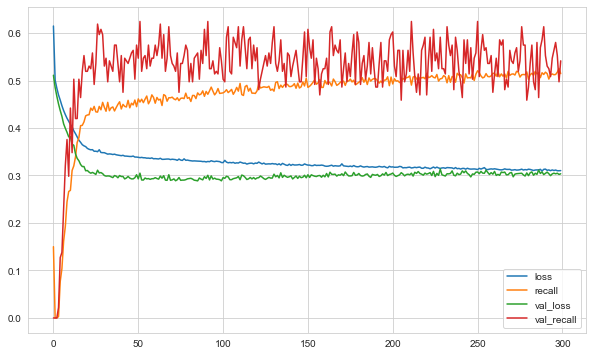

In [213]:
loss_df.plot()

In [214]:
y_pred = model.predict(X_test) > 0.5
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

#Recall degeri cok düsük, kesinlikle imbalance data var.

32/32 [==============================] - 0s 1ms/step
[[767  29]
 [106  98]]
              precision    recall  f1-score   support

           0       0.88      0.96      0.92       796
           1       0.77      0.48      0.59       204

    accuracy                           0.86      1000
   macro avg       0.83      0.72      0.76      1000
weighted avg       0.86      0.86      0.85      1000



In [215]:
loss, recall= model.evaluate(X_test, y_test, verbose=0)
print("loss : ", loss)
print("recall : ", recall)

loss :  0.3465462625026703
recall :  0.4803921580314636


#### ROC & AUC for Model - Model icin ROC & AUC

32/32 [==============================] - 0s 975us/step


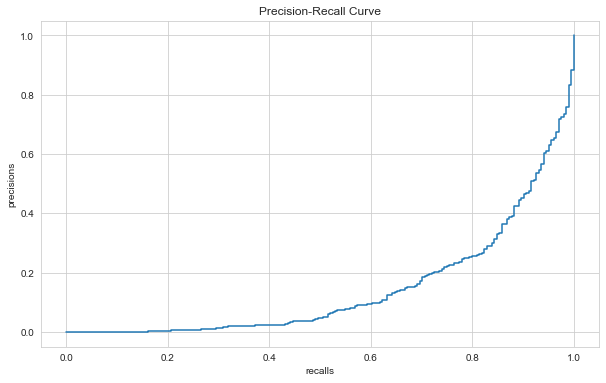

In [229]:
y_pred_proba = grid_model.predict_proba(X_test)[:,1]
precisions, recalls, thresholds = roc_curve(y_test, y_pred_proba)
plt.plot([0,1],[0,1],'k--')
plt.plot(precisions, recalls, label='ANN')
plt.xlabel('recalls')
plt.ylabel('precisions')
plt.title('ROC curve')
plt.show()

In [226]:
roc_auc_score(y_test, y_pred_proba)

0.8554229480737018

## with class_weigth

* Investigate how the "class_weight" hyper-parameter is used in a Neural Network.
***************

## sınıf ağırlığı ile 

* Bir Sinir Ağında "sınıf_ağırlığı" hiper parametresinin nasıl kullanıldığını araştırın.

### Create The Model

In [266]:
tf.random.set_seed(seed)

model = Sequential()

model.add(Dense(32, activation = 'relu', input_dim = X_train.shape[1]))
model.add(Dense(16, activation = 'relu'))
model.add(Dense(8, activation = 'relu'))
model.add(Dense(1, activation = 'sigmoid'))

opt = Adam(lr=0.001)
model.compile(optimizer=opt, loss='binary_crossentropy', metrics=['Recall'])

In [267]:
from sklearn.utils import class_weight

In [268]:
#from sklearn.utils import class_weight
class_weights = class_weight.compute_class_weight('balanced',
                                                  classes=np.unique(y_train),
                                                  y=y_train)
class_weights = {0: class_weights[0], 1: class_weights[1]}
class_weights

{0: 0.6278777731268314, 1: 2.454991816693944}

In [269]:
model.fit(x = X_train, y = y_train, validation_split = 0.1, batch_size = 128, epochs = 300, verbose=1)

Epoch 1/300
64/64 [==============================] - 1s 4ms/step - loss: 0.6147 - recall: 0.1501 - val_loss: 0.5111 - val_recall: 0.0000e+00
Epoch 2/300
64/64 [==============================] - 0s 2ms/step - loss: 0.5009 - recall: 0.0000e+00 - val_loss: 0.4853 - val_recall: 0.0000e+00
Epoch 3/300
64/64 [==============================] - 0s 2ms/step - loss: 0.4839 - recall: 0.0000e+00 - val_loss: 0.4669 - val_recall: 0.0000e+00
Epoch 4/300
64/64 [==============================] - 0s 2ms/step - loss: 0.4696 - recall: 0.0030 - val_loss: 0.4506 - val_recall: 0.0221
Epoch 5/300
64/64 [==============================] - 0s 2ms/step - loss: 0.4587 - recall: 0.0769 - val_loss: 0.4368 - val_recall: 0.1271
Epoch 6/300
64/64 [==============================] - 0s 2ms/step - loss: 0.4469 - recall: 0.1041 - val_loss: 0.4245 - val_recall: 0.1381
Epoch 7/300
64/64 [==============================] - 0s 2ms/step - loss: 0.4368 - recall: 0.1616 - val_loss: 0.4088 - val_recall: 0.2265
Epoch 8/300
64/64 [==

64/64 [==============================] - 0s 2ms/step - loss: 0.3352 - recall: 0.4643 - val_loss: 0.2934 - val_recall: 0.5470
Epoch 61/300
64/64 [==============================] - 0s 2ms/step - loss: 0.3355 - recall: 0.4522 - val_loss: 0.2954 - val_recall: 0.5746
Epoch 62/300
64/64 [==============================] - 0s 2ms/step - loss: 0.3352 - recall: 0.4643 - val_loss: 0.2936 - val_recall: 0.5525
Epoch 63/300
64/64 [==============================] - 0s 2ms/step - loss: 0.3348 - recall: 0.4588 - val_loss: 0.2923 - val_recall: 0.5746
Epoch 64/300
64/64 [==============================] - 0s 2ms/step - loss: 0.3362 - recall: 0.4607 - val_loss: 0.2987 - val_recall: 0.6188
Epoch 65/300
64/64 [==============================] - 0s 2ms/step - loss: 0.3340 - recall: 0.4473 - val_loss: 0.2944 - val_recall: 0.5470
Epoch 66/300
64/64 [==============================] - 0s 2ms/step - loss: 0.3341 - recall: 0.4703 - val_loss: 0.2995 - val_recall: 0.5967
Epoch 67/300
64/64 [===========================

64/64 [==============================] - 0s 2ms/step - loss: 0.3245 - recall: 0.4734 - val_loss: 0.2956 - val_recall: 0.5746
Epoch 120/300
64/64 [==============================] - 0s 2ms/step - loss: 0.3262 - recall: 0.4728 - val_loss: 0.2924 - val_recall: 0.5414
Epoch 121/300
64/64 [==============================] - 0s 2ms/step - loss: 0.3256 - recall: 0.4782 - val_loss: 0.2948 - val_recall: 0.5691
Epoch 122/300
64/64 [==============================] - 0s 2ms/step - loss: 0.3282 - recall: 0.4927 - val_loss: 0.2954 - val_recall: 0.4807
Epoch 123/300
64/64 [==============================] - 0s 2ms/step - loss: 0.3263 - recall: 0.4843 - val_loss: 0.2989 - val_recall: 0.5028
Epoch 124/300
64/64 [==============================] - 0s 2ms/step - loss: 0.3244 - recall: 0.4855 - val_loss: 0.2966 - val_recall: 0.5193
Epoch 125/300
64/64 [==============================] - 0s 2ms/step - loss: 0.3261 - recall: 0.4867 - val_loss: 0.2935 - val_recall: 0.5359
Epoch 126/300
64/64 [====================

64/64 [==============================] - 0s 2ms/step - loss: 0.3210 - recall: 0.5006 - val_loss: 0.3064 - val_recall: 0.5967
Epoch 179/300
64/64 [==============================] - 0s 2ms/step - loss: 0.3191 - recall: 0.4909 - val_loss: 0.3003 - val_recall: 0.4917
Epoch 180/300
64/64 [==============================] - 0s 2ms/step - loss: 0.3184 - recall: 0.4933 - val_loss: 0.3011 - val_recall: 0.6022
Epoch 181/300
64/64 [==============================] - 0s 2ms/step - loss: 0.3186 - recall: 0.4964 - val_loss: 0.3042 - val_recall: 0.5801
Epoch 182/300
64/64 [==============================] - 0s 2ms/step - loss: 0.3202 - recall: 0.4988 - val_loss: 0.3000 - val_recall: 0.4917
Epoch 183/300
64/64 [==============================] - 0s 2ms/step - loss: 0.3186 - recall: 0.5061 - val_loss: 0.2988 - val_recall: 0.5359
Epoch 184/300
64/64 [==============================] - 0s 2ms/step - loss: 0.3177 - recall: 0.4964 - val_loss: 0.2995 - val_recall: 0.5525
Epoch 185/300
64/64 [====================

64/64 [==============================] - 0s 2ms/step - loss: 0.3142 - recall: 0.5073 - val_loss: 0.3006 - val_recall: 0.4807
Epoch 238/300
64/64 [==============================] - 0s 2ms/step - loss: 0.3167 - recall: 0.4964 - val_loss: 0.2993 - val_recall: 0.5912
Epoch 239/300
64/64 [==============================] - 0s 2ms/step - loss: 0.3142 - recall: 0.5151 - val_loss: 0.3048 - val_recall: 0.5635
Epoch 240/300
64/64 [==============================] - 0s 2ms/step - loss: 0.3149 - recall: 0.5115 - val_loss: 0.3018 - val_recall: 0.5193
Epoch 241/300
64/64 [==============================] - 0s 2ms/step - loss: 0.3135 - recall: 0.5121 - val_loss: 0.3029 - val_recall: 0.4972
Epoch 242/300
64/64 [==============================] - 0s 2ms/step - loss: 0.3149 - recall: 0.5061 - val_loss: 0.3097 - val_recall: 0.4641
Epoch 243/300
64/64 [==============================] - 0s 2ms/step - loss: 0.3150 - recall: 0.4946 - val_loss: 0.3058 - val_recall: 0.5856
Epoch 244/300
64/64 [====================

64/64 [==============================] - 0s 2ms/step - loss: 0.3105 - recall: 0.5121 - val_loss: 0.3049 - val_recall: 0.5635
Epoch 297/300
64/64 [==============================] - 0s 2ms/step - loss: 0.3115 - recall: 0.5127 - val_loss: 0.3035 - val_recall: 0.5801
Epoch 298/300
64/64 [==============================] - 0s 2ms/step - loss: 0.3100 - recall: 0.5176 - val_loss: 0.3048 - val_recall: 0.5525
Epoch 299/300
64/64 [==============================] - 0s 2ms/step - loss: 0.3100 - recall: 0.5254 - val_loss: 0.3022 - val_recall: 0.4972
Epoch 300/300
64/64 [==============================] - 0s 2ms/step - loss: 0.3103 - recall: 0.5145 - val_loss: 0.3036 - val_recall: 0.5414


### Evaluate The Model

- Plot the model history to observe the changing of metrics
- Make prediction to see "confusion matrix" and "classification report"
- Check ROC (Receiver Operating Curve) and AUC (Area Under Curve) for the model
*******************
### Modeli Değerlendirin

- Metriklerin değişimini gözlemlemek için model geçmişini çizin
- "Karışıklık matrisi" ve "sınıflandırma raporunu" görmek için tahmin yapın
- Model için ROC (Alıcı Çalışma Eğrisi) ve AUC'yi (Eğri Altındaki Alan) kontrol edin

In [270]:
loss_df = pd.DataFrame(model.history.history)

In [271]:
loss_df.head()

,loss,recall,val_loss,val_recall
0,0.615,0.150,0.511,0.000
1,0.501,0.000,0.485,0.000
2,0.484,0.000,0.467,0.000
3,0.470,0.003,0.451,0.022
4,0.459,0.077,0.437,0.127


<AxesSubplot:>

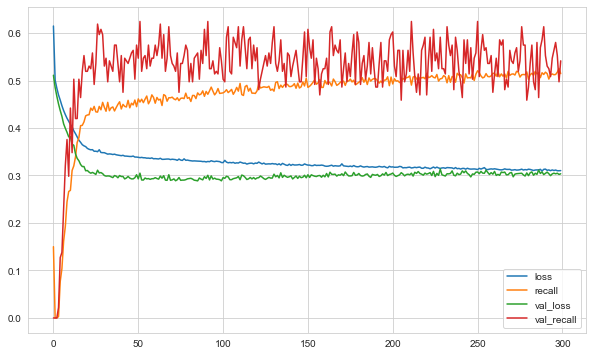

In [272]:
loss_df.plot()

In [273]:
y_pred = model.predict(X_test) > 0.5
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

32/32 [==============================] - 0s 968us/step
[[767  29]
 [106  98]]
              precision    recall  f1-score   support

           0       0.88      0.96      0.92       796
           1       0.77      0.48      0.59       204

    accuracy                           0.86      1000
   macro avg       0.83      0.72      0.76      1000
weighted avg       0.86      0.86      0.85      1000



In [274]:
loss, recall= model.evaluate(X_test, y_test, verbose=0)
print("loss : ", loss)
print("recall : ", recall)

loss :  0.3465462625026703
recall :  0.4803921580314636


## Implementation Different Methods to Develop The Model

- Implement the following methods on model creating with "class_weight" parameter
- Create and evaluate model for each method 
***************
## Modeli Geliştirmek İçin Farklı Yöntemlerin Uygulanması

- "class_weight" parametresi ile model oluşturmada aşağıdaki yöntemleri uygulayın
- Her yöntem için model oluşturun ve değerlendirin

### Increase The Learning Rate and Observe The Results
**********
### Öğrenme Hızını Artırın ve Sonuçları Gözlemleyin

In [275]:
tf.random.set_seed(seed)

model = Sequential()

model.add(Dense(32, activation = 'relu', input_dim = X_train.shape[1]))
model.add(Dense(16, activation = 'relu'))
model.add(Dense(8, activation = 'relu'))
model.add(Dense(1, activation = 'sigmoid'))

opt = Adam(lr=0.003)
model.compile(optimizer=opt, loss='binary_crossentropy', metrics=['Recall'])

In [276]:
model.fit(x = X_train, y = y_train, validation_split = 0.1, batch_size = 128, epochs = 300, verbose=1)

Epoch 1/300
64/64 [==============================] - 1s 4ms/step - loss: 0.5431 - recall: 0.0593 - val_loss: 0.4791 - val_recall: 0.0000e+00
Epoch 2/300
64/64 [==============================] - 0s 2ms/step - loss: 0.4721 - recall: 0.0127 - val_loss: 0.4455 - val_recall: 0.1050
Epoch 3/300
64/64 [==============================] - 0s 2ms/step - loss: 0.4496 - recall: 0.1023 - val_loss: 0.4172 - val_recall: 0.2155
Epoch 4/300
64/64 [==============================] - 0s 2ms/step - loss: 0.4306 - recall: 0.2076 - val_loss: 0.3995 - val_recall: 0.3425
Epoch 5/300
64/64 [==============================] - 0s 2ms/step - loss: 0.4226 - recall: 0.2609 - val_loss: 0.3916 - val_recall: 0.2541
Epoch 6/300
64/64 [==============================] - 0s 2ms/step - loss: 0.4104 - recall: 0.2809 - val_loss: 0.3688 - val_recall: 0.3315
Epoch 7/300
64/64 [==============================] - 0s 2ms/step - loss: 0.3943 - recall: 0.3426 - val_loss: 0.3563 - val_recall: 0.3425
Epoch 8/300
64/64 [==================

64/64 [==============================] - 0s 2ms/step - loss: 0.3246 - recall: 0.4885 - val_loss: 0.2965 - val_recall: 0.5691
Epoch 61/300
64/64 [==============================] - 0s 2ms/step - loss: 0.3250 - recall: 0.4843 - val_loss: 0.2975 - val_recall: 0.5912
Epoch 62/300
64/64 [==============================] - 0s 2ms/step - loss: 0.3221 - recall: 0.4903 - val_loss: 0.3009 - val_recall: 0.5801
Epoch 63/300
64/64 [==============================] - 0s 2ms/step - loss: 0.3207 - recall: 0.4897 - val_loss: 0.2937 - val_recall: 0.5359
Epoch 64/300
64/64 [==============================] - 0s 2ms/step - loss: 0.3242 - recall: 0.4867 - val_loss: 0.2953 - val_recall: 0.5470
Epoch 65/300
64/64 [==============================] - 0s 2ms/step - loss: 0.3214 - recall: 0.4855 - val_loss: 0.2911 - val_recall: 0.5580
Epoch 66/300
64/64 [==============================] - 0s 2ms/step - loss: 0.3223 - recall: 0.4897 - val_loss: 0.3042 - val_recall: 0.5967
Epoch 67/300
64/64 [===========================

64/64 [==============================] - 0s 2ms/step - loss: 0.3114 - recall: 0.4988 - val_loss: 0.2995 - val_recall: 0.5525
Epoch 120/300
64/64 [==============================] - 0s 2ms/step - loss: 0.3126 - recall: 0.5042 - val_loss: 0.3046 - val_recall: 0.5801
Epoch 121/300
64/64 [==============================] - 0s 2ms/step - loss: 0.3094 - recall: 0.5103 - val_loss: 0.3113 - val_recall: 0.5801
Epoch 122/300
64/64 [==============================] - 0s 2ms/step - loss: 0.3109 - recall: 0.5224 - val_loss: 0.3018 - val_recall: 0.4972
Epoch 123/300
64/64 [==============================] - 0s 2ms/step - loss: 0.3093 - recall: 0.5067 - val_loss: 0.3091 - val_recall: 0.5138
Epoch 124/300
64/64 [==============================] - 0s 2ms/step - loss: 0.3082 - recall: 0.5067 - val_loss: 0.3037 - val_recall: 0.5580
Epoch 125/300
64/64 [==============================] - 0s 2ms/step - loss: 0.3071 - recall: 0.5206 - val_loss: 0.3020 - val_recall: 0.5414
Epoch 126/300
64/64 [====================

64/64 [==============================] - 0s 2ms/step - loss: 0.3011 - recall: 0.5381 - val_loss: 0.3156 - val_recall: 0.5801
Epoch 179/300
64/64 [==============================] - 0s 2ms/step - loss: 0.2989 - recall: 0.5151 - val_loss: 0.3124 - val_recall: 0.5801
Epoch 180/300
64/64 [==============================] - 0s 2ms/step - loss: 0.2966 - recall: 0.5357 - val_loss: 0.3108 - val_recall: 0.5691
Epoch 181/300
64/64 [==============================] - 0s 2ms/step - loss: 0.2973 - recall: 0.5400 - val_loss: 0.3215 - val_recall: 0.5691
Epoch 182/300
64/64 [==============================] - 0s 2ms/step - loss: 0.2975 - recall: 0.5375 - val_loss: 0.3095 - val_recall: 0.5359
Epoch 183/300
64/64 [==============================] - 0s 2ms/step - loss: 0.2975 - recall: 0.5472 - val_loss: 0.3197 - val_recall: 0.5635
Epoch 184/300
64/64 [==============================] - 0s 2ms/step - loss: 0.2952 - recall: 0.5357 - val_loss: 0.3291 - val_recall: 0.5967
Epoch 185/300
64/64 [====================

64/64 [==============================] - 0s 2ms/step - loss: 0.2849 - recall: 0.5521 - val_loss: 0.3364 - val_recall: 0.4917
Epoch 238/300
64/64 [==============================] - 0s 2ms/step - loss: 0.2937 - recall: 0.5345 - val_loss: 0.3336 - val_recall: 0.5746
Epoch 239/300
64/64 [==============================] - 0s 2ms/step - loss: 0.2850 - recall: 0.5484 - val_loss: 0.3362 - val_recall: 0.5635
Epoch 240/300
64/64 [==============================] - 0s 2ms/step - loss: 0.2895 - recall: 0.5448 - val_loss: 0.3500 - val_recall: 0.5635
Epoch 241/300
64/64 [==============================] - 0s 2ms/step - loss: 0.2858 - recall: 0.5605 - val_loss: 0.3280 - val_recall: 0.5249
Epoch 242/300
64/64 [==============================] - 0s 2ms/step - loss: 0.2920 - recall: 0.5448 - val_loss: 0.3318 - val_recall: 0.4972
Epoch 243/300
64/64 [==============================] - 0s 2ms/step - loss: 0.2843 - recall: 0.5472 - val_loss: 0.3452 - val_recall: 0.6243
Epoch 244/300
64/64 [====================

64/64 [==============================] - 0s 2ms/step - loss: 0.2784 - recall: 0.5696 - val_loss: 0.3532 - val_recall: 0.5801
Epoch 297/300
64/64 [==============================] - 0s 2ms/step - loss: 0.2783 - recall: 0.5654 - val_loss: 0.3574 - val_recall: 0.5967
Epoch 298/300
64/64 [==============================] - 0s 2ms/step - loss: 0.2769 - recall: 0.5726 - val_loss: 0.3428 - val_recall: 0.5304
Epoch 299/300
64/64 [==============================] - 0s 2ms/step - loss: 0.2755 - recall: 0.5811 - val_loss: 0.3469 - val_recall: 0.5746
Epoch 300/300
64/64 [==============================] - 0s 2ms/step - loss: 0.2773 - recall: 0.5660 - val_loss: 0.3479 - val_recall: 0.5193


In [277]:
loss_df = pd.DataFrame(model.history.history)

<AxesSubplot:>

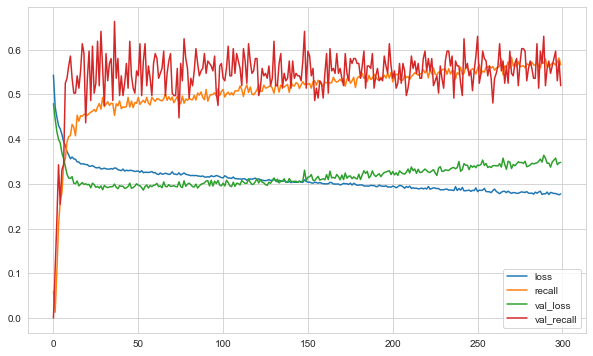

In [278]:
loss_df.plot()

In [279]:
y_pred = model.predict(X_test) > 0.5
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

32/32 [==============================] - 0s 1ms/step
[[760  36]
 [112  92]]
              precision    recall  f1-score   support

           0       0.87      0.95      0.91       796
           1       0.72      0.45      0.55       204

    accuracy                           0.85      1000
   macro avg       0.80      0.70      0.73      1000
weighted avg       0.84      0.85      0.84      1000



In [280]:
tf.random.set_seed(seed)

model = Sequential()

model.add(Dense(32, activation = 'relu', input_dim = X_train.shape[1]))
model.add(Dense(16, activation = 'relu'))
model.add(Dense(8, activation = 'relu'))
model.add(Dense(1, activation = 'sigmoid'))

opt = Adam(lr=0.005)
model.compile(optimizer=opt, loss='binary_crossentropy', metrics=['Recall'])

In [281]:
model.fit(x = X_train, y = y_train, validation_split = 0.1, batch_size = 128, epochs = 300, verbose=1)

Epoch 1/300
64/64 [==============================] - 1s 5ms/step - loss: 0.5194 - recall: 0.0406 - val_loss: 0.4566 - val_recall: 0.0000e+00
Epoch 2/300
64/64 [==============================] - 0s 2ms/step - loss: 0.4569 - recall: 0.0787 - val_loss: 0.4236 - val_recall: 0.1492
Epoch 3/300
64/64 [==============================] - 0s 2ms/step - loss: 0.4358 - recall: 0.1786 - val_loss: 0.3983 - val_recall: 0.3260
Epoch 4/300
64/64 [==============================] - 0s 2ms/step - loss: 0.4088 - recall: 0.2875 - val_loss: 0.3533 - val_recall: 0.3867
Epoch 5/300
64/64 [==============================] - 0s 2ms/step - loss: 0.3867 - recall: 0.3493 - val_loss: 0.3348 - val_recall: 0.3923
Epoch 6/300
64/64 [==============================] - 0s 2ms/step - loss: 0.3652 - recall: 0.4025 - val_loss: 0.3127 - val_recall: 0.5359
Epoch 7/300
64/64 [==============================] - 0s 2ms/step - loss: 0.3574 - recall: 0.4304 - val_loss: 0.3128 - val_recall: 0.4309
Epoch 8/300
64/64 [==================

64/64 [==============================] - 0s 2ms/step - loss: 0.3154 - recall: 0.5109 - val_loss: 0.2973 - val_recall: 0.5359
Epoch 61/300
64/64 [==============================] - 0s 2ms/step - loss: 0.3160 - recall: 0.4994 - val_loss: 0.2900 - val_recall: 0.5691
Epoch 62/300
64/64 [==============================] - 0s 2ms/step - loss: 0.3154 - recall: 0.5030 - val_loss: 0.2958 - val_recall: 0.5801
Epoch 63/300
64/64 [==============================] - 0s 2ms/step - loss: 0.3110 - recall: 0.5048 - val_loss: 0.3074 - val_recall: 0.5249
Epoch 64/300
64/64 [==============================] - 0s 2ms/step - loss: 0.3173 - recall: 0.4994 - val_loss: 0.2920 - val_recall: 0.5249
Epoch 65/300
64/64 [==============================] - 0s 2ms/step - loss: 0.3123 - recall: 0.4958 - val_loss: 0.2983 - val_recall: 0.5193
Epoch 66/300
64/64 [==============================] - 0s 2ms/step - loss: 0.3130 - recall: 0.5042 - val_loss: 0.3110 - val_recall: 0.6188
Epoch 67/300
64/64 [===========================

64/64 [==============================] - 0s 2ms/step - loss: 0.2994 - recall: 0.5254 - val_loss: 0.3129 - val_recall: 0.5856
Epoch 120/300
64/64 [==============================] - 0s 2ms/step - loss: 0.2969 - recall: 0.5472 - val_loss: 0.3239 - val_recall: 0.5635
Epoch 121/300
64/64 [==============================] - 0s 2ms/step - loss: 0.2950 - recall: 0.5430 - val_loss: 0.3268 - val_recall: 0.5580
Epoch 122/300
64/64 [==============================] - 0s 2ms/step - loss: 0.2963 - recall: 0.5563 - val_loss: 0.3210 - val_recall: 0.4917
Epoch 123/300
64/64 [==============================] - 0s 2ms/step - loss: 0.2935 - recall: 0.5496 - val_loss: 0.3172 - val_recall: 0.5470
Epoch 124/300
64/64 [==============================] - 0s 2ms/step - loss: 0.2945 - recall: 0.5484 - val_loss: 0.3340 - val_recall: 0.5580
Epoch 125/300
64/64 [==============================] - 0s 2ms/step - loss: 0.2939 - recall: 0.5442 - val_loss: 0.3198 - val_recall: 0.5635
Epoch 126/300
64/64 [====================

64/64 [==============================] - 0s 2ms/step - loss: 0.2824 - recall: 0.5793 - val_loss: 0.3256 - val_recall: 0.5635
Epoch 179/300
64/64 [==============================] - 0s 2ms/step - loss: 0.2815 - recall: 0.5684 - val_loss: 0.3242 - val_recall: 0.5414
Epoch 180/300
64/64 [==============================] - 0s 2ms/step - loss: 0.2826 - recall: 0.5581 - val_loss: 0.3260 - val_recall: 0.6077
Epoch 181/300
64/64 [==============================] - 0s 2ms/step - loss: 0.2801 - recall: 0.5811 - val_loss: 0.3287 - val_recall: 0.5083
Epoch 182/300
64/64 [==============================] - 0s 2ms/step - loss: 0.2816 - recall: 0.5714 - val_loss: 0.3278 - val_recall: 0.5359
Epoch 183/300
64/64 [==============================] - 0s 2ms/step - loss: 0.2767 - recall: 0.5860 - val_loss: 0.3274 - val_recall: 0.5746
Epoch 184/300
64/64 [==============================] - 0s 2ms/step - loss: 0.2810 - recall: 0.5660 - val_loss: 0.3261 - val_recall: 0.5691
Epoch 185/300
64/64 [====================

64/64 [==============================] - 0s 2ms/step - loss: 0.2714 - recall: 0.6011 - val_loss: 0.3467 - val_recall: 0.5083
Epoch 238/300
64/64 [==============================] - 0s 2ms/step - loss: 0.2729 - recall: 0.5896 - val_loss: 0.3438 - val_recall: 0.5856
Epoch 239/300
64/64 [==============================] - 0s 2ms/step - loss: 0.2710 - recall: 0.6023 - val_loss: 0.3367 - val_recall: 0.5635
Epoch 240/300
64/64 [==============================] - 0s 2ms/step - loss: 0.2701 - recall: 0.5938 - val_loss: 0.3428 - val_recall: 0.5580
Epoch 241/300
64/64 [==============================] - 0s 2ms/step - loss: 0.2686 - recall: 0.6132 - val_loss: 0.3491 - val_recall: 0.5249
Epoch 242/300
64/64 [==============================] - 0s 2ms/step - loss: 0.2759 - recall: 0.5841 - val_loss: 0.3392 - val_recall: 0.5083
Epoch 243/300
64/64 [==============================] - 0s 2ms/step - loss: 0.2693 - recall: 0.5854 - val_loss: 0.3554 - val_recall: 0.5856
Epoch 244/300
64/64 [====================

64/64 [==============================] - 0s 2ms/step - loss: 0.2613 - recall: 0.6065 - val_loss: 0.3481 - val_recall: 0.5967
Epoch 297/300
64/64 [==============================] - 0s 2ms/step - loss: 0.2611 - recall: 0.6247 - val_loss: 0.3619 - val_recall: 0.5856
Epoch 298/300
64/64 [==============================] - 0s 2ms/step - loss: 0.2628 - recall: 0.5993 - val_loss: 0.3489 - val_recall: 0.5691
Epoch 299/300
64/64 [==============================] - 0s 2ms/step - loss: 0.2647 - recall: 0.6077 - val_loss: 0.3420 - val_recall: 0.5414
Epoch 300/300
64/64 [==============================] - 0s 2ms/step - loss: 0.2635 - recall: 0.6108 - val_loss: 0.3546 - val_recall: 0.5470


In [ ]:
loss_df = pd.DataFrame(model.history.history)

<AxesSubplot:>

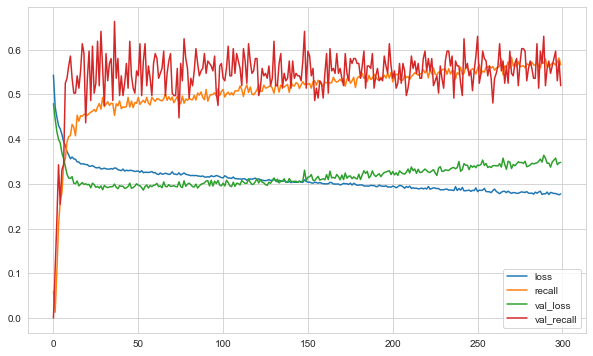

In [282]:
loss_df.plot()

In [ ]:
y_pred = model.predict(X_test) > 0.5
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

In [283]:
tf.random.set_seed(seed)

model = Sequential()

model.add(Dense(32, activation = 'relu', input_dim = X_train.shape[1]))
model.add(Dense(16, activation = 'relu'))
model.add(Dense(8, activation = 'relu'))
model.add(Dense(1, activation = 'sigmoid'))

opt = Adam(lr=0.01)
model.compile(optimizer=opt, loss='binary_crossentropy', metrics=['Recall'])

In [284]:
model.fit(x = X_train, y = y_train, validation_split = 0.1, batch_size = 128, epochs = 300, verbose=1)

Epoch 1/300
64/64 [==============================] - 1s 4ms/step - loss: 0.4971 - recall: 0.0345 - val_loss: 0.4349 - val_recall: 0.0829
Epoch 2/300
64/64 [==============================] - 0s 2ms/step - loss: 0.4408 - recall: 0.1653 - val_loss: 0.4014 - val_recall: 0.1326
Epoch 3/300
64/64 [==============================] - 0s 2ms/step - loss: 0.4008 - recall: 0.3257 - val_loss: 0.3360 - val_recall: 0.3867
Epoch 4/300
64/64 [==============================] - 0s 2ms/step - loss: 0.3655 - recall: 0.4013 - val_loss: 0.3157 - val_recall: 0.4475
Epoch 5/300
64/64 [==============================] - 0s 2ms/step - loss: 0.3724 - recall: 0.3795 - val_loss: 0.3299 - val_recall: 0.3425
Epoch 6/300
64/64 [==============================] - 0s 2ms/step - loss: 0.3628 - recall: 0.3838 - val_loss: 0.3110 - val_recall: 0.5028
Epoch 7/300
64/64 [==============================] - 0s 2ms/step - loss: 0.3547 - recall: 0.4086 - val_loss: 0.3068 - val_recall: 0.4144
Epoch 8/300
64/64 [======================

64/64 [==============================] - 0s 2ms/step - loss: 0.3206 - recall: 0.4600 - val_loss: 0.2981 - val_recall: 0.4475
Epoch 61/300
64/64 [==============================] - 0s 2ms/step - loss: 0.3179 - recall: 0.4558 - val_loss: 0.2905 - val_recall: 0.5470
Epoch 62/300
64/64 [==============================] - 0s 2ms/step - loss: 0.3200 - recall: 0.4510 - val_loss: 0.3015 - val_recall: 0.5359
Epoch 63/300
64/64 [==============================] - 0s 2ms/step - loss: 0.3162 - recall: 0.4691 - val_loss: 0.3114 - val_recall: 0.4696
Epoch 64/300
64/64 [==============================] - 0s 2ms/step - loss: 0.3175 - recall: 0.4534 - val_loss: 0.3066 - val_recall: 0.4530
Epoch 65/300
64/64 [==============================] - 0s 2ms/step - loss: 0.3163 - recall: 0.4510 - val_loss: 0.3072 - val_recall: 0.5359
Epoch 66/300
64/64 [==============================] - 0s 2ms/step - loss: 0.3175 - recall: 0.4631 - val_loss: 0.2982 - val_recall: 0.5138
Epoch 67/300
64/64 [===========================

64/64 [==============================] - 0s 2ms/step - loss: 0.3023 - recall: 0.4849 - val_loss: 0.3074 - val_recall: 0.5138
Epoch 120/300
64/64 [==============================] - 0s 2ms/step - loss: 0.2978 - recall: 0.4933 - val_loss: 0.3155 - val_recall: 0.5359
Epoch 121/300
64/64 [==============================] - 0s 2ms/step - loss: 0.2976 - recall: 0.4903 - val_loss: 0.3282 - val_recall: 0.5249
Epoch 122/300
64/64 [==============================] - 0s 2ms/step - loss: 0.3022 - recall: 0.5018 - val_loss: 0.3471 - val_recall: 0.4586
Epoch 123/300
64/64 [==============================] - 0s 2ms/step - loss: 0.2956 - recall: 0.4921 - val_loss: 0.3244 - val_recall: 0.5083
Epoch 124/300
64/64 [==============================] - 0s 2ms/step - loss: 0.2977 - recall: 0.4952 - val_loss: 0.3158 - val_recall: 0.5083
Epoch 125/300
64/64 [==============================] - 0s 2ms/step - loss: 0.2964 - recall: 0.4988 - val_loss: 0.3305 - val_recall: 0.5083
Epoch 126/300
64/64 [====================

64/64 [==============================] - 0s 2ms/step - loss: 0.2898 - recall: 0.4933 - val_loss: 0.3579 - val_recall: 0.4972
Epoch 179/300
64/64 [==============================] - 0s 2ms/step - loss: 0.2884 - recall: 0.5085 - val_loss: 0.3521 - val_recall: 0.4751
Epoch 180/300
64/64 [==============================] - 0s 2ms/step - loss: 0.2811 - recall: 0.5127 - val_loss: 0.3627 - val_recall: 0.5193
Epoch 181/300
64/64 [==============================] - 0s 2ms/step - loss: 0.2861 - recall: 0.5109 - val_loss: 0.3515 - val_recall: 0.5193
Epoch 182/300
64/64 [==============================] - 0s 2ms/step - loss: 0.2870 - recall: 0.5200 - val_loss: 0.3544 - val_recall: 0.4862
Epoch 183/300
64/64 [==============================] - 0s 2ms/step - loss: 0.2875 - recall: 0.5121 - val_loss: 0.3471 - val_recall: 0.4917
Epoch 184/300
64/64 [==============================] - 0s 2ms/step - loss: 0.2847 - recall: 0.5091 - val_loss: 0.3606 - val_recall: 0.4807
Epoch 185/300
64/64 [====================

64/64 [==============================] - 0s 2ms/step - loss: 0.2753 - recall: 0.5581 - val_loss: 0.3660 - val_recall: 0.4972
Epoch 238/300
64/64 [==============================] - 0s 2ms/step - loss: 0.2754 - recall: 0.5466 - val_loss: 0.3636 - val_recall: 0.5414
Epoch 239/300
64/64 [==============================] - 0s 2ms/step - loss: 0.2780 - recall: 0.5442 - val_loss: 0.3719 - val_recall: 0.5304
Epoch 240/300
64/64 [==============================] - 0s 2ms/step - loss: 0.2778 - recall: 0.5545 - val_loss: 0.3792 - val_recall: 0.5083
Epoch 241/300
64/64 [==============================] - 0s 2ms/step - loss: 0.2738 - recall: 0.5515 - val_loss: 0.3728 - val_recall: 0.4530
Epoch 242/300
64/64 [==============================] - 0s 2ms/step - loss: 0.2821 - recall: 0.5430 - val_loss: 0.3607 - val_recall: 0.4641
Epoch 243/300
64/64 [==============================] - 0s 2ms/step - loss: 0.2740 - recall: 0.5424 - val_loss: 0.3770 - val_recall: 0.5249
Epoch 244/300
64/64 [====================

64/64 [==============================] - 0s 2ms/step - loss: 0.2673 - recall: 0.5672 - val_loss: 0.3884 - val_recall: 0.5470
Epoch 297/300
64/64 [==============================] - 0s 2ms/step - loss: 0.2683 - recall: 0.5642 - val_loss: 0.4098 - val_recall: 0.5856
Epoch 298/300
64/64 [==============================] - 0s 2ms/step - loss: 0.2650 - recall: 0.5714 - val_loss: 0.4076 - val_recall: 0.5193
Epoch 299/300
64/64 [==============================] - 0s 2ms/step - loss: 0.2670 - recall: 0.5702 - val_loss: 0.4070 - val_recall: 0.5028
Epoch 300/300
64/64 [==============================] - 0s 2ms/step - loss: 0.2688 - recall: 0.5684 - val_loss: 0.4113 - val_recall: 0.4972


<AxesSubplot:>

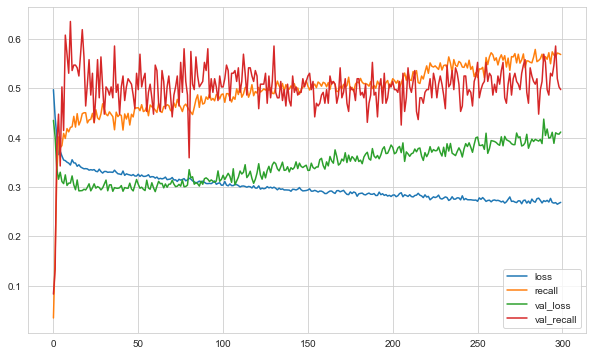

In [285]:
loss_df = pd.DataFrame(model.history.history)
loss_df.plot()

In [286]:
y_pred = model.predict(X_test) > 0.5
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

32/32 [==============================] - 0s 987us/step
[[759  37]
 [123  81]]
              precision    recall  f1-score   support

           0       0.86      0.95      0.90       796
           1       0.69      0.40      0.50       204

    accuracy                           0.84      1000
   macro avg       0.77      0.68      0.70      1000
weighted avg       0.83      0.84      0.82      1000



### Add Dropout Layer

In [288]:
from tensorflow.keras.layers import Dropout

In [289]:
tf.random.set_seed(seed)

model = Sequential()

model.add(Dense(32, activation = 'relu', input_dim = X_train.shape[1]))
model.add(Dropout(0.2))
model.add(Dense(16, activation = 'relu'))
model.add(Dropout(0.2))
model.add(Dense(8, activation = 'relu'))
model.add(Dropout(0.2))
model.add(Dense(1, activation = 'sigmoid'))

opt = Adam(lr=0.001)
model.compile(optimizer=opt, loss='binary_crossentropy', metrics=['Recall'])

In [290]:
model.fit(x = X_train, y = y_train, validation_split = 0.1, batch_size = 128, epochs = 300, verbose=1)

Epoch 1/300
64/64 [==============================] - 1s 5ms/step - loss: 0.6308 - recall: 0.2040 - val_loss: 0.5195 - val_recall: 0.0000e+00
Epoch 2/300
64/64 [==============================] - 0s 2ms/step - loss: 0.5345 - recall: 0.0091 - val_loss: 0.4914 - val_recall: 0.0000e+00
Epoch 3/300
64/64 [==============================] - 0s 2ms/step - loss: 0.5161 - recall: 6.0533e-04 - val_loss: 0.4725 - val_recall: 0.0000e+00
Epoch 4/300
64/64 [==============================] - 0s 2ms/step - loss: 0.4978 - recall: 6.0533e-04 - val_loss: 0.4610 - val_recall: 0.0000e+00
Epoch 5/300
64/64 [==============================] - 0s 2ms/step - loss: 0.4884 - recall: 6.0533e-04 - val_loss: 0.4537 - val_recall: 0.0000e+00
Epoch 6/300
64/64 [==============================] - 0s 2ms/step - loss: 0.4798 - recall: 0.0042 - val_loss: 0.4428 - val_recall: 0.0000e+00
Epoch 7/300
64/64 [==============================] - 0s 2ms/step - loss: 0.4758 - recall: 0.0157 - val_loss: 0.4368 - val_recall: 0.0000e+00
E

64/64 [==============================] - 0s 2ms/step - loss: 0.3720 - recall: 0.3929 - val_loss: 0.3122 - val_recall: 0.4530
Epoch 61/300
64/64 [==============================] - 0s 2ms/step - loss: 0.3631 - recall: 0.3765 - val_loss: 0.3077 - val_recall: 0.4530
Epoch 62/300
64/64 [==============================] - 0s 2ms/step - loss: 0.3719 - recall: 0.3916 - val_loss: 0.3146 - val_recall: 0.4807
Epoch 63/300
64/64 [==============================] - 0s 2ms/step - loss: 0.3620 - recall: 0.3983 - val_loss: 0.3059 - val_recall: 0.4917
Epoch 64/300
64/64 [==============================] - 0s 2ms/step - loss: 0.3700 - recall: 0.3814 - val_loss: 0.3083 - val_recall: 0.4696
Epoch 65/300
64/64 [==============================] - 0s 2ms/step - loss: 0.3664 - recall: 0.3959 - val_loss: 0.3104 - val_recall: 0.4530
Epoch 66/300
64/64 [==============================] - 0s 2ms/step - loss: 0.3605 - recall: 0.3971 - val_loss: 0.3061 - val_recall: 0.4807
Epoch 67/300
64/64 [===========================

64/64 [==============================] - 0s 2ms/step - loss: 0.3448 - recall: 0.4207 - val_loss: 0.2940 - val_recall: 0.5470
Epoch 120/300
64/64 [==============================] - 0s 2ms/step - loss: 0.3484 - recall: 0.4413 - val_loss: 0.2961 - val_recall: 0.5083
Epoch 121/300
64/64 [==============================] - 0s 2ms/step - loss: 0.3541 - recall: 0.4189 - val_loss: 0.2972 - val_recall: 0.5083
Epoch 122/300
64/64 [==============================] - 0s 2ms/step - loss: 0.3461 - recall: 0.4377 - val_loss: 0.2943 - val_recall: 0.5304
Epoch 123/300
64/64 [==============================] - 0s 2ms/step - loss: 0.3466 - recall: 0.4262 - val_loss: 0.2936 - val_recall: 0.5249
Epoch 124/300
64/64 [==============================] - 0s 2ms/step - loss: 0.3548 - recall: 0.4171 - val_loss: 0.2940 - val_recall: 0.5083
Epoch 125/300
64/64 [==============================] - 0s 2ms/step - loss: 0.3444 - recall: 0.4322 - val_loss: 0.2920 - val_recall: 0.5304
Epoch 126/300
64/64 [====================

64/64 [==============================] - 0s 2ms/step - loss: 0.3409 - recall: 0.4492 - val_loss: 0.2888 - val_recall: 0.5746
Epoch 179/300
64/64 [==============================] - 0s 2ms/step - loss: 0.3395 - recall: 0.4316 - val_loss: 0.2882 - val_recall: 0.5525
Epoch 180/300
64/64 [==============================] - 0s 2ms/step - loss: 0.3397 - recall: 0.4473 - val_loss: 0.2896 - val_recall: 0.5414
Epoch 181/300
64/64 [==============================] - 0s 2ms/step - loss: 0.3396 - recall: 0.4473 - val_loss: 0.2911 - val_recall: 0.5414
Epoch 182/300
64/64 [==============================] - 0s 2ms/step - loss: 0.3414 - recall: 0.4364 - val_loss: 0.2945 - val_recall: 0.5138
Epoch 183/300
64/64 [==============================] - 0s 2ms/step - loss: 0.3395 - recall: 0.4413 - val_loss: 0.2937 - val_recall: 0.5138
Epoch 184/300
64/64 [==============================] - 0s 2ms/step - loss: 0.3392 - recall: 0.4443 - val_loss: 0.2908 - val_recall: 0.5525
Epoch 185/300
64/64 [====================

64/64 [==============================] - 0s 2ms/step - loss: 0.3406 - recall: 0.4407 - val_loss: 0.2856 - val_recall: 0.5414
Epoch 238/300
64/64 [==============================] - 0s 2ms/step - loss: 0.3398 - recall: 0.4159 - val_loss: 0.2873 - val_recall: 0.5414
Epoch 239/300
64/64 [==============================] - 0s 2ms/step - loss: 0.3388 - recall: 0.4346 - val_loss: 0.2867 - val_recall: 0.5525
Epoch 240/300
64/64 [==============================] - 0s 2ms/step - loss: 0.3404 - recall: 0.4377 - val_loss: 0.2884 - val_recall: 0.5249
Epoch 241/300
64/64 [==============================] - 0s 2ms/step - loss: 0.3399 - recall: 0.4298 - val_loss: 0.2840 - val_recall: 0.5470
Epoch 242/300
64/64 [==============================] - 0s 2ms/step - loss: 0.3379 - recall: 0.4316 - val_loss: 0.2876 - val_recall: 0.5414
Epoch 243/300
64/64 [==============================] - 0s 2ms/step - loss: 0.3400 - recall: 0.4165 - val_loss: 0.2868 - val_recall: 0.5470
Epoch 244/300
64/64 [====================

64/64 [==============================] - 0s 2ms/step - loss: 0.3381 - recall: 0.4358 - val_loss: 0.2890 - val_recall: 0.5470
Epoch 297/300
64/64 [==============================] - 0s 2ms/step - loss: 0.3377 - recall: 0.4389 - val_loss: 0.2878 - val_recall: 0.5525
Epoch 298/300
64/64 [==============================] - 0s 2ms/step - loss: 0.3361 - recall: 0.4546 - val_loss: 0.2886 - val_recall: 0.5525
Epoch 299/300
64/64 [==============================] - 0s 2ms/step - loss: 0.3345 - recall: 0.4485 - val_loss: 0.2907 - val_recall: 0.5083
Epoch 300/300
64/64 [==============================] - 0s 2ms/step - loss: 0.3359 - recall: 0.4461 - val_loss: 0.2886 - val_recall: 0.5580


<AxesSubplot:>

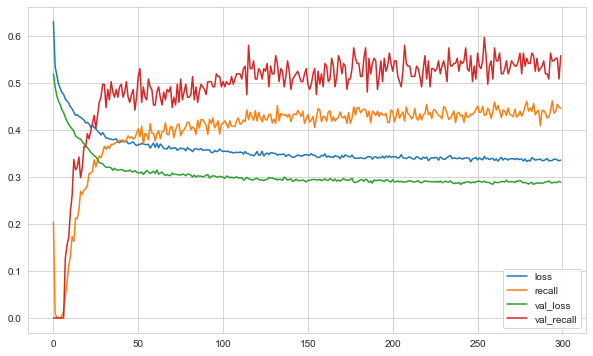

In [291]:
loss_df = pd.DataFrame(model.history.history)
loss_df.plot()

In [292]:
y_pred = model.predict(X_test) > 0.5
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

32/32 [==============================] - 0s 1ms/step
[[767  29]
 [118  86]]
              precision    recall  f1-score   support

           0       0.87      0.96      0.91       796
           1       0.75      0.42      0.54       204

    accuracy                           0.85      1000
   macro avg       0.81      0.69      0.73      1000
weighted avg       0.84      0.85      0.84      1000



### Add Early Stop

In [293]:
from tensorflow.keras.callbacks import EarlyStopping

#### Monitor the "val_loss" as metric

In [294]:
tf.random.set_seed(seed)

model = Sequential()

model.add(Dense(32, activation = 'relu', input_dim = X_train.shape[1]))
model.add(Dropout(0.2))
model.add(Dense(16, activation = 'relu'))
model.add(Dropout(0.2))
model.add(Dense(8, activation = 'relu'))
model.add(Dropout(0.2))
model.add(Dense(1, activation = 'sigmoid'))

opt = Adam(lr=0.001)
model.compile(optimizer=opt, loss='binary_crossentropy', metrics=['Recall'])

In [295]:
early_stop = EarlyStopping(monitor = "val_loss", mode = "min", verbose = 1, patience = 50, restore_best_weights = True)

In [296]:
model.fit(x = X_train, y = y_train, validation_split = 0.1, batch_size = 128, epochs = 300, verbose = 1,
          callbacks = [early_stop], class_weight=class_weights)

Epoch 1/300
64/64 [==============================] - 1s 5ms/step - loss: 0.6908 - recall: 0.6646 - val_loss: 0.6801 - val_recall: 0.6133
Epoch 2/300
64/64 [==============================] - 0s 2ms/step - loss: 0.6758 - recall: 0.6429 - val_loss: 0.6698 - val_recall: 0.7017
Epoch 3/300
64/64 [==============================] - 0s 2ms/step - loss: 0.6600 - recall: 0.6435 - val_loss: 0.6116 - val_recall: 0.5801
Epoch 4/300
64/64 [==============================] - 0s 2ms/step - loss: 0.6515 - recall: 0.6368 - val_loss: 0.5945 - val_recall: 0.5856
Epoch 5/300
64/64 [==============================] - 0s 2ms/step - loss: 0.6419 - recall: 0.6374 - val_loss: 0.6158 - val_recall: 0.7293
Epoch 6/300
64/64 [==============================] - 0s 2ms/step - loss: 0.6331 - recall: 0.6283 - val_loss: 0.5740 - val_recall: 0.6575
Epoch 7/300
64/64 [==============================] - 0s 2ms/step - loss: 0.6216 - recall: 0.6447 - val_loss: 0.6000 - val_recall: 0.7238
Epoch 8/300
64/64 [======================

64/64 [==============================] - 0s 2ms/step - loss: 0.4878 - recall: 0.7724 - val_loss: 0.4350 - val_recall: 0.8177
Epoch 61/300
64/64 [==============================] - 0s 2ms/step - loss: 0.4881 - recall: 0.7627 - val_loss: 0.4110 - val_recall: 0.8122
Epoch 62/300
64/64 [==============================] - 0s 2ms/step - loss: 0.4845 - recall: 0.7591 - val_loss: 0.4705 - val_recall: 0.8453
Epoch 63/300
64/64 [==============================] - 0s 2ms/step - loss: 0.4836 - recall: 0.7651 - val_loss: 0.4201 - val_recall: 0.8287
Epoch 64/300
64/64 [==============================] - 0s 2ms/step - loss: 0.4924 - recall: 0.7524 - val_loss: 0.4398 - val_recall: 0.8398
Epoch 65/300
64/64 [==============================] - 0s 2ms/step - loss: 0.4865 - recall: 0.7730 - val_loss: 0.4221 - val_recall: 0.8177
Epoch 66/300
64/64 [==============================] - 0s 2ms/step - loss: 0.4840 - recall: 0.7597 - val_loss: 0.4332 - val_recall: 0.8343
Epoch 67/300
64/64 [===========================

64/64 [==============================] - 0s 2ms/step - loss: 0.4739 - recall: 0.7754 - val_loss: 0.4360 - val_recall: 0.8343
Epoch 120/300
64/64 [==============================] - 0s 2ms/step - loss: 0.4716 - recall: 0.7863 - val_loss: 0.4142 - val_recall: 0.8177
Epoch 121/300
64/64 [==============================] - 0s 2ms/step - loss: 0.4779 - recall: 0.7809 - val_loss: 0.4383 - val_recall: 0.8398
Epoch 122/300
64/64 [==============================] - 0s 2ms/step - loss: 0.4722 - recall: 0.7857 - val_loss: 0.4414 - val_recall: 0.8398
Epoch 123/300
64/64 [==============================] - 0s 2ms/step - loss: 0.4719 - recall: 0.7833 - val_loss: 0.4212 - val_recall: 0.8398
Epoch 124/300
64/64 [==============================] - 0s 2ms/step - loss: 0.4784 - recall: 0.7736 - val_loss: 0.4133 - val_recall: 0.8011
Epoch 125/300
64/64 [==============================] - 0s 2ms/step - loss: 0.4639 - recall: 0.7857 - val_loss: 0.4178 - val_recall: 0.8232
Epoch 126/300
64/64 [====================

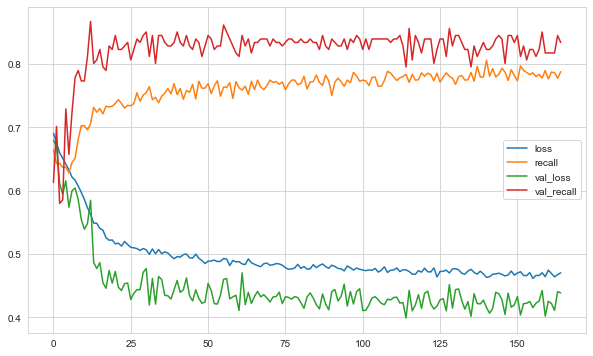

In [298]:
loss_df = pd.DataFrame(model.history.history)
loss_df.plot();

In [299]:
y_pred = model.predict(X_test) > 0.5
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

32/32 [==============================] - 0s 935us/step
[[632 164]
 [ 49 155]]
              precision    recall  f1-score   support

           0       0.93      0.79      0.86       796
           1       0.49      0.76      0.59       204

    accuracy                           0.79      1000
   macro avg       0.71      0.78      0.72      1000
weighted avg       0.84      0.79      0.80      1000



#### Monitor the "val_recall" as metric

In [300]:
tf.random.set_seed(seed)

model = Sequential()

model.add(Dense(32, activation = 'relu', input_dim = X_train.shape[1]))
model.add(Dropout(0.2))
model.add(Dense(16, activation = 'relu'))
model.add(Dropout(0.2))
model.add(Dense(8, activation = 'relu'))
model.add(Dropout(0.2))
model.add(Dense(1, activation = 'sigmoid'))

opt = Adam(lr=0.001)
model.compile(optimizer=opt, loss='binary_crossentropy', metrics=['Recall'])

In [301]:
early_stop = EarlyStopping(monitor='val_recall', mode='max', verbose=1, patience=50, restore_best_weights=True)

In [302]:
model.fit(x=X_train, y=y_train, 
          validation_split=0.1, 
          batch_size=128, epochs=300, 
          verbose=1, callbacks=[early_stop], 
          class_weight=class_weights)

Epoch 1/300
64/64 [==============================] - 1s 5ms/step - loss: 0.6908 - recall: 0.6646 - val_loss: 0.6801 - val_recall: 0.6133
Epoch 2/300
64/64 [==============================] - 0s 2ms/step - loss: 0.6758 - recall: 0.6429 - val_loss: 0.6698 - val_recall: 0.7017
Epoch 3/300
64/64 [==============================] - 0s 2ms/step - loss: 0.6600 - recall: 0.6435 - val_loss: 0.6116 - val_recall: 0.5801
Epoch 4/300
64/64 [==============================] - 0s 2ms/step - loss: 0.6515 - recall: 0.6368 - val_loss: 0.5945 - val_recall: 0.5856
Epoch 5/300
64/64 [==============================] - 0s 2ms/step - loss: 0.6419 - recall: 0.6374 - val_loss: 0.6158 - val_recall: 0.7293
Epoch 6/300
64/64 [==============================] - 0s 2ms/step - loss: 0.6331 - recall: 0.6283 - val_loss: 0.5740 - val_recall: 0.6575
Epoch 7/300
64/64 [==============================] - 0s 2ms/step - loss: 0.6216 - recall: 0.6447 - val_loss: 0.6000 - val_recall: 0.7238
Epoch 8/300
64/64 [======================

64/64 [==============================] - 0s 2ms/step - loss: 0.4878 - recall: 0.7724 - val_loss: 0.4350 - val_recall: 0.8177
Epoch 61/300
64/64 [==============================] - 0s 2ms/step - loss: 0.4881 - recall: 0.7627 - val_loss: 0.4110 - val_recall: 0.8122
Epoch 62/300
64/64 [==============================] - 0s 2ms/step - loss: 0.4845 - recall: 0.7591 - val_loss: 0.4705 - val_recall: 0.8453
Epoch 63/300
64/64 [==============================] - 0s 2ms/step - loss: 0.4836 - recall: 0.7651 - val_loss: 0.4201 - val_recall: 0.8287
Epoch 63: early stopping


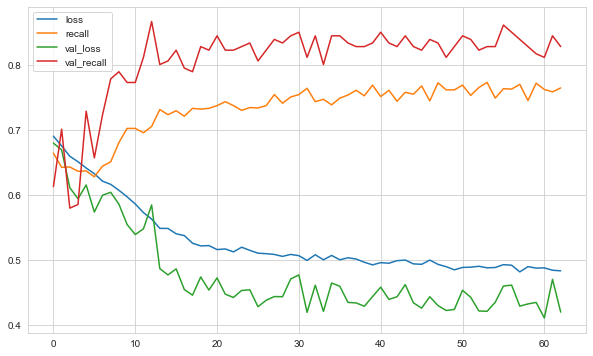

In [303]:
loss_df = pd.DataFrame(model.history.history)
loss_df.plot();

In [304]:
y_pred = model.predict(X_test) > 0.5
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

32/32 [==============================] - 0s 935us/step
[[494 302]
 [ 32 172]]
              precision    recall  f1-score   support

           0       0.94      0.62      0.75       796
           1       0.36      0.84      0.51       204

    accuracy                           0.67      1000
   macro avg       0.65      0.73      0.63      1000
weighted avg       0.82      0.67      0.70      1000



## GridSearchCV

In [306]:
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier
from tensorflow.keras.optimizers import Adam, Adadelta, RMSprop, Nadam

In [313]:
def build_classifier(optimizer, learn_rate):
    tf.random.set_seed(seed)
    classifier = Sequential()
    classifier.add(Dense(units = 36, activation = 'relu'))
    classifier.add(Dense(units = 18, activation = 'relu'))
    classifier.add(Dense(units = 9, activation = 'relu'))
    classifier.add(Dense(units = 1, activation = 'sigmoid'))
    classifier.compile(optimizer=optimizer(learn_rate), loss = 'binary_crossentropy', metrics = ['Recall'])
    return classifier

In [314]:
early_stop = EarlyStopping(monitor='val_recall', mode='max', verbose=1, patience=50, restore_best_weights=True)

In [315]:
classifier_model = KerasClassifier(build_fn = build_classifier, validation_split = 0.1, epochs = 300)

parameters = {'batch_size': [64, 128, 256],
              'optimizer': [Adam, RMSprop, Adadelta, Nadam],
              'learn_rate': [0.001, 0.003, 0.005]}

grid_model = GridSearchCV(estimator = classifier_model,
                          param_grid = parameters,
                          scoring = 'recall',
                          cv = 5,
                          n_jobs = -1,
                          verbose = 1)

grid_model.fit(X_train, y_train, callbacks = [early_stop], class_weight=class_weights)

Fitting 5 folds for each of 36 candidates, totalling 180 fits
Epoch 1/300
32/32 [==============================] - 1s 8ms/step - loss: 0.6497 - recall: 0.6392 - val_loss: 0.5927 - val_recall: 0.7017
Epoch 2/300
32/32 [==============================] - 0s 2ms/step - loss: 0.6062 - recall: 0.6840 - val_loss: 0.6063 - val_recall: 0.7845
Epoch 3/300
32/32 [==============================] - 0s 2ms/step - loss: 0.5835 - recall: 0.7016 - val_loss: 0.5474 - val_recall: 0.7459
Epoch 4/300
32/32 [==============================] - 0s 2ms/step - loss: 0.5690 - recall: 0.7173 - val_loss: 0.4603 - val_recall: 0.6243
Epoch 5/300
32/32 [==============================] - 0s 2ms/step - loss: 0.5499 - recall: 0.7173 - val_loss: 0.4192 - val_recall: 0.5967
Epoch 6/300
32/32 [==============================] - 0s 2ms/step - loss: 0.5337 - recall: 0.7403 - val_loss: 0.4602 - val_recall: 0.7348
Epoch 7/300
32/32 [==============================] - 0s 2ms/step - loss: 0.5233 - recall: 0.7470 - val_loss: 0.4128 

Epoch 60/300
32/32 [==============================] - 0s 2ms/step - loss: 0.4369 - recall: 0.7742 - val_loss: 0.4178 - val_recall: 0.7901
Epoch 61/300
32/32 [==============================] - 0s 2ms/step - loss: 0.4364 - recall: 0.7797 - val_loss: 0.3395 - val_recall: 0.7348
Epoch 62/300
32/32 [==============================] - 0s 2ms/step - loss: 0.4368 - recall: 0.7730 - val_loss: 0.4083 - val_recall: 0.8177
Epoch 63/300
32/32 [==============================] - 0s 2ms/step - loss: 0.4367 - recall: 0.7760 - val_loss: 0.3951 - val_recall: 0.7845
Epoch 64/300
32/32 [==============================] - 0s 2ms/step - loss: 0.4360 - recall: 0.7754 - val_loss: 0.3532 - val_recall: 0.7624
Epoch 64: early stopping


GridSearchCV(cv=5,
             estimator=<keras.wrappers.scikit_learn.KerasClassifier object at 0x00000164D8435E50>,
             n_jobs=-1,
             param_grid={'batch_size': [64, 128, 256],
                         'learn_rate': [0.001, 0.003, 0.005],
                         'optimizer': [<class 'keras.optimizers.optimizer_v2.adam.Adam'>,
                                       <class 'keras.optimizers.optimizer_v2.rmsprop.RMSprop'>,
                                       <class 'keras.optimizers.optimizer_v2.adadelta.Adadelta'>,
                                       <class 'keras.optimizers.optimizer_v2.nadam.Nadam'>]},
             scoring='recall', verbose=1)

### Evaluate The Model

- Plot the model history to observe the changing of metrics
- Make prediction to see "confusion matrix" and "classification report"
- Check ROC (Receiver Operating Curve) and AUC (Area Under Curve) for the model
**************
### Modeli Değerlendirin

- Metriklerin değişimini gözlemlemek için model geçmişini çizin
- "Karışıklık matrisi" ve "sınıflandırma raporunu" görmek için tahmin yapın
- Model için ROC (Alıcı Çalışma Eğrisi) ve AUC'yi (Eğri Altındaki Alan) kontrol edin

In [316]:
grid_model.best_score_

0.904790659173598

In [317]:
grid_model.best_params_

{'batch_size': 256,
 'learn_rate': 0.005,
 'optimizer': keras.optimizers.optimizer_v2.rmsprop.RMSprop}

In [318]:
grid_result = pd.DataFrame(grid_model.cv_results_)[["mean_test_score", "std_test_score", "rank_test_score", "params"]].sort_values(by="rank_test_score")
grid_result

,mean_test_score,std_test_score,rank_test_score,params
33,0.905,0.038,1,"{'batch_size': 256, 'learn_rate': 0.005, 'opti..."
29,0.902,0.030,2,"{'batch_size': 256, 'learn_rate': 0.003, 'opti..."
35,0.901,0.016,3,"{'batch_size': 256, 'learn_rate': 0.005, 'opti..."
31,0.899,0.033,4,"{'batch_size': 256, 'learn_rate': 0.003, 'opti..."
9,0.885,0.030,5,"{'batch_size': 64, 'learn_rate': 0.005, 'optim..."
5,0.883,0.026,6,"{'batch_size': 64, 'learn_rate': 0.003, 'optim..."
7,0.877,0.026,7,"{'batch_size': 64, 'learn_rate': 0.003, 'optim..."
11,0.875,0.032,8,"{'batch_size': 64, 'learn_rate': 0.005, 'optim..."
17,0.871,0.023,9,"{'batch_size': 128, 'learn_rate': 0.003, 'opti..."
23,0.870,0.027,10,"{'batch_size': 128, 'learn_rate': 0.005, 'opti..."


In [319]:
y_pred = grid_model.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

32/32 [==============================] - 0s 1ms/step
[[444 352]
 [ 20 184]]
              precision    recall  f1-score   support

           0       0.96      0.56      0.70       796
           1       0.34      0.90      0.50       204

    accuracy                           0.63      1000
   macro avg       0.65      0.73      0.60      1000
weighted avg       0.83      0.63      0.66      1000



32/32 [==============================] - 0s 1ms/step


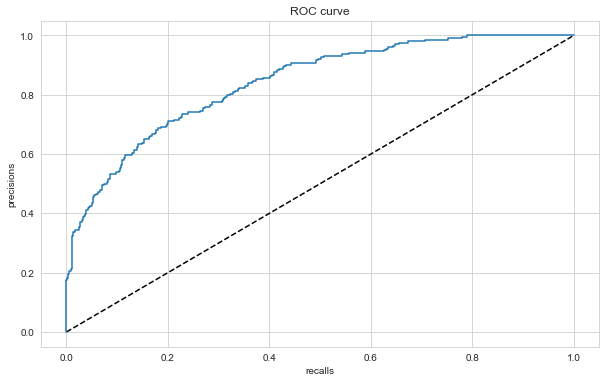

In [331]:
y_pred_proba = grid_model.predict_proba(X_test)[:,1]
precisions, recalls, thresholds = roc_curve(y_test, y_pred_proba)
plt.plot([0,1],[0,1],'k--')
plt.plot(precisions, recalls, label='ANN')
plt.xlabel('recalls')
plt.ylabel('precisions')
plt.title('ROC curve')
plt.show()

In [332]:
roc_auc_score(y_test, y_pred_proba)

0.8405261602128289

# Final Model and Model Deployment

In [356]:
import pickle
pickle.dump(scaler, open("scaler_Exited", 'wb'))

In [357]:
tf.random.set_seed(seed)
final_model = Sequential()

model.add(Dense(36, activation = "relu", input_dim = X_train.shape[1]))
model.add(Dense(18, activation = "relu"))
model.add(Dense(9, activation = "relu"))
model.add(Dense(1, activation = "sigmoid"))

final_model.compile(optimizer='RMSprop', loss = "binary_crossentropy", metrics = ["Recall"])

In [358]:
early_stop = EarlyStopping(monitor='val_recall', mode='max', verbose=1, patience=50, restore_best_weights=True)

In [361]:
final_model.fit(x = X_train, y = y_train, validation_data = (X_test, y_test), batch_size = 256, epochs = 500, verbose = 1, callbacks = [early_stop], class_weight = class_weights)

In [ ]:
loss_df = pd.DataFrame(model.history.history)
loss_df.plot()

In [ ]:
loss, accuracy = model.evaluate(X_test, y_test, verbose=0)
print("loss : ", loss)
print("recall : ", recall)

In [ ]:
y_pred = model.predict(X_test) > 0.5
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

In [ ]:
model.save('model_Exited.h5')

#### Loading Model and Scaler - Modeli Yükleme ve Ölçekleme

In [ ]:
from tensorflow.keras.models import load_model

In [ ]:
model_Exited = load_model('model_Exited.h5')
scaler_Exited = pickle.load(open("scaler_Exited", "rb"))

### Prediction


In [ ]:
single_Exited = df.drop('Exited', axis = 1).iloc[0:1, :]
single_Exited

In [ ]:
single_Exited = scaler_Exited.transform(single_Exited)
single_Exited

In [ ]:
(model_Exited.predict(single_Exited) > 0.5).astype("int32")

In [ ]:
df["Exited"].iloc[0]

## Comparison with ML

#### Logistic Regression


In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
log_model=LogisticRegression()
log_model.fit(X_train, y_train)
y_test_pred = log_model.predict(X_test)
print(confusion_matrix(y_test, y_test_pred))
print(classification_report(y_test, y_test_pred))

#### Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
rf_model = RandomForestClassifier()
rf_model.fit(X_train, y_train)
y_test_pred = rf_model.predict(X_test)
print(confusion_matrix(y_test, y_test_pred))
print(classification_report(y_test, y_test_pred))